In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. Downloading *gensim* library

In [0]:
!pip install gensim

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 552kB 33.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c0c0bf200bc65e11fbcdd0e6452eee780eb79475465d8476ecc3e9a426531863
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=4a486f5a9522b5e619ff064585a0f8f0fc51a3ff0dd1a540686e031772ae3f46
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


# 2. Importing libraries

In [0]:
import gensim
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from gensim import corpora,models
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import pickle 
import pyLDAvis
from scipy.sparse import dok_matrix
from scipy.sparse import csr_matrix, issparse


# 3. Loading data and creating corpus

In [0]:
df = pd.read_csv('/content/drive/My Drive/cleaned_preprocessed_dataset_with_only_nouns_and_title.csv',index_col=0)
df = df.iloc[:100000,:]
df.head()

Title
0         check image mime type
1  prevent firefox press ctrl-w
2             r error type list
3                 character url
4                contact detail

In [0]:
df.shape

(100000, 1)

In order to perform LDA, we first need to conver the documents from string format to tokenized format. 

In [0]:
df['Title'] = df['Title'].apply(lambda x: str(x).split(' '))
df.head()

Title
0         [check, image, mime, type]
1  [prevent, firefox, press, ctrl-w]
2             [r, error, type, list]
3                   [character, url]
4                  [contact, detail]

We now convert the text documents into a *dictionary* consisting of all unique words in the dataset. The representation consists of each unique word accompanied by a unique ID. 

In [0]:
dictionary = corpora.Dictionary(df['Title'])

Below, we can see the first 11 instances in the dictionary showing the IDs and the words.

In [0]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 check
1 image
2 mime
3 type
4 ctrl-w
5 firefox
6 press
7 prevent
8 error
9 list
10 r


Below, we use this dictionary of unique words to convert the dataset containing the documents to the bag of words (BOW) representation, also known as the *corpus*. 

In [0]:
#Converting the dataset into the bag of words format
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]

The corpus contains IDs representing each token and the frequency of that token in each document. Below, we can see the first 20 instances of the corpus. These 20 instances represent the first 20 documents in the BOW format. 

In [0]:
corpus[:20]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(3, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1)],
 [(13, 1), (14, 1)],
 [(15, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1), (40, 1)],
 [(41, 1), (42, 1)],
 [(43, 1)],
 [(44, 1), (45, 2)],
 [(46, 1), (47, 1), (48, 1)],
 [(10, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1), (53, 1), (54, 1)],
 [(26, 1), (47, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(50, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)]]

In [0]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
count = 0
for i in corpus_tfidf:
  count = count + 1
  print (i)
  if count > 10:  
    break
#corpus_tfidf = csr_matrix(corpus_tfidf)
#print (corpus_tfidf.toarray()[0])

[(0, 0.4324362285170671), (1, 0.3400147007278977), (2, 0.7352512076370518), (3, 0.39597294506457137)]
[(4, 0.7307555258428255), (5, 0.38586296208285703), (6, 0.42741204360605), (7, 0.36664026091431823)]
[(3, 0.4910368453884094), (8, 0.39654357171903315), (9, 0.4472752142445557), (10, 0.6337041067578765)]
[(11, 0.6511999331492017), (12, 0.758906217570047)]
[(13, 0.703350259697448), (14, 0.7108434512489599)]
[(15, 0.6496168765377784), (16, 0.7602617402692975)]
[(17, 0.5965129297338804), (18, 0.6390460225330046), (19, 0.4152995160670111), (20, 0.2516323065497668)]
[(21, 0.3811539407504564), (22, 0.5980675041399135), (23, 0.5576527062334482), (24, 0.4313471840324957)]
[(25, 0.7956451687365886), (26, 0.605762961451198)]
[(27, 0.2930988459474298), (28, 0.58056770893597), (29, 0.49047127193549894), (30, 0.43041799881802806), (31, 0.25796809676170995), (32, 0.29097240521692525)]
[(33, 0.24956987590763943), (34, 0.28044339911957505), (35, 0.5343913508627418), (36, 0.5686260503574477), (37, 0.50

# 4. Modeling using Latent Dirichlet Allocation

# 4.1 Bag of words => topics=4, passes=50, no_below=5, no_above=0.5, keep_n=100000

In [0]:
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=4,id2word=dictionary,passes=50)

In [0]:
pprint.pprint (lda.print_topics())

[(0,
  '0.018*"custom" + 0.014*"image" + 0.012*"value" + 0.009*"change" + '
  '0.009*"jquery" + 0.008*"database" + 0.008*"php" + 0.007*"create" + '
  '0.007*"access" + 0.007*"process"'),
 (1,
  '0.014*"jquery" + 0.013*"type" + 0.012*"asp.net" + 0.012*"mvc" + '
  '0.009*"array" + 0.009*"code" + 0.009*"application" + 0.008*"app" + '
  '0.008*"iphone" + 0.008*"java"'),
 (2,
  '0.023*"server" + 0.015*"sql" + 0.014*"javascript" + 0.012*"work" + '
  '0.010*"connection" + 0.009*"ios" + 0.007*"loop" + 0.007*"text" + '
  '0.007*"query" + 0.006*"function"'),
 (3,
  '0.014*"error" + 0.014*"windows" + 0.014*"list" + 0.012*"data" + '
  '0.010*"java" + 0.010*"call" + 0.009*"way" + 0.007*"name" + 0.007*"ruby" + '
  '0.007*"javascript"')]


Above are the topics of the *gensim* model displaying highest occurring words in each topic. For this first iteration of the model, it is hard to differentiate the 4 topics. There is no clear distinction based on the words. 

# 4.2 Bag of words => no_below=10, no_above=0.5, keep_n=1000, topics=5, passes=10

[(0,
  '0.037*"server" + 0.032*"error" + 0.026*"code" + 0.024*"array" + 0.024*"php" '
  '+ 0.024*"javascript" + 0.023*"page" + 0.022*"sql" + 0.020*"form" + '
  '0.020*"view"'),
 (1,
  '0.048*"work" + 0.046*"function" + 0.039*"java" + 0.038*"class" + '
  '0.025*"create" + 0.025*"call" + 0.025*"query" + 0.024*"mysql" + '
  '0.018*"rail" + 0.017*"c"'),
 (2,
  '0.038*"image" + 0.034*"application" + 0.032*"list" + 0.028*"access" + '
  '0.022*"jquery" + 0.022*"method" + 0.022*"issue" + 0.021*"type" + '
  '0.020*"display" + 0.018*"database"'),
 (3,
  '0.026*"python" + 0.025*"file" + 0.023*"name" + 0.022*"asp.net" + '
  '0.019*"script" + 0.016*"google" + 0.016*"app" + 0.015*"map" + 0.014*"group" '
  '+ 0.013*"mvc"'),
 (4,
  '0.040*"data" + 0.039*"windows" + 0.035*"value" + 0.025*"time" + '
  '0.025*"service" + 0.021*"field" + 0.020*"line" + 0.018*"command" + '
  '0.016*"content" + 0.016*"store"')]
Topic  1 : 
-7.394157439138876
Topic  2 : 
-6.258224631277867
Topic  3 : 
-6.111528589457938
Topi

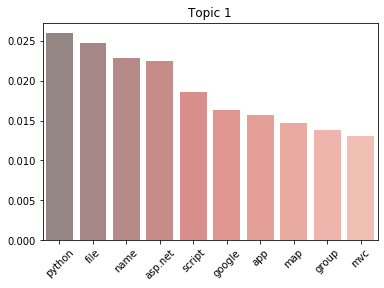

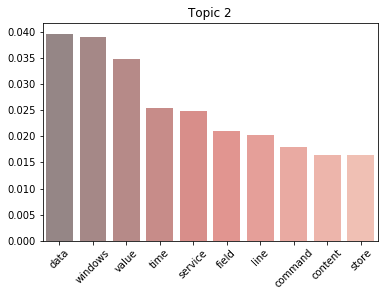

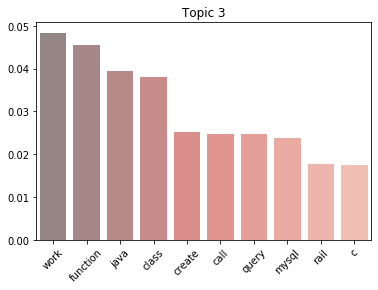

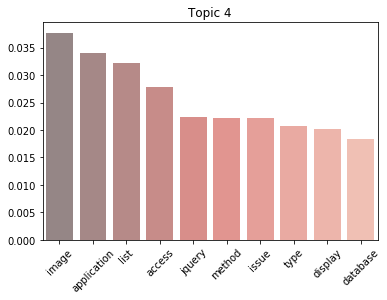

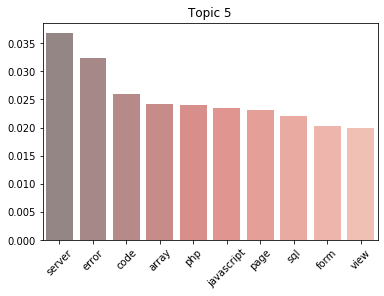

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=5,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.3 Bag of words => no_below=10,no_above=0.5,keep_n=1000,num_topics=6,passes=1

[(0,
  '0.040*"function" + 0.032*"time" + 0.030*"show" + 0.030*"load" + '
  '0.023*"string" + 0.023*"project" + 0.021*"type" + 0.018*"link" + 0.016*"x" '
  '+ 0.016*"studio"'),
 (1,
  '0.041*"application" + 0.040*"windows" + 0.026*"issue" + 0.026*"android" + '
  '0.026*"app" + 0.021*"script" + 0.021*"call" + 0.021*"rail" + 0.021*"create" '
  '+ 0.020*"program"'),
 (2,
  '0.058*"work" + 0.044*"page" + 0.039*"list" + 0.029*"jquery" + 0.028*"view" '
  '+ 0.028*"number" + 0.024*"display" + 0.024*"method" + 0.022*"html" + '
  '0.022*"button"'),
 (3,
  '0.048*"server" + 0.044*"java" + 0.042*"class" + 0.031*"access" + '
  '0.030*"database" + 0.026*"form" + 0.022*"data" + 0.021*"file" + 0.020*"sql" '
  '+ 0.018*"test"'),
 (4,
  '0.051*"value" + 0.035*"javascript" + 0.035*"php" + 0.031*"c" + '
  '0.029*"array" + 0.025*"query" + 0.025*"error" + 0.020*"return" + '
  '0.019*"control" + 0.019*"field"'),
 (5,
  '0.039*"code" + 0.033*"python" + 0.030*"change" + 0.030*"mysql" + '
  '0.027*"problem" + 

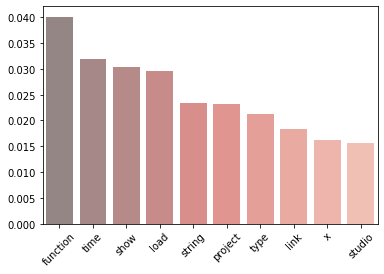

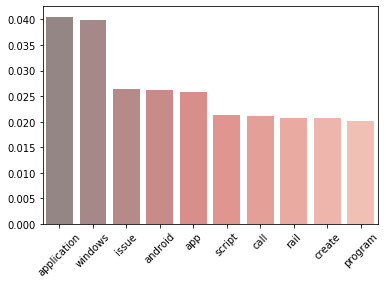

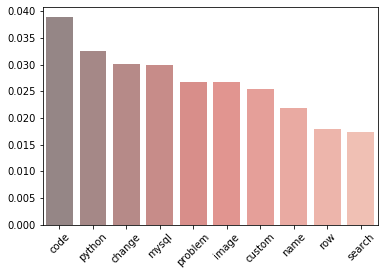

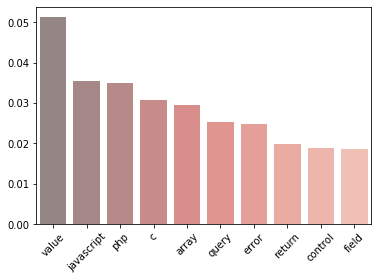

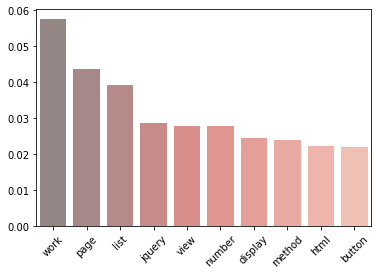

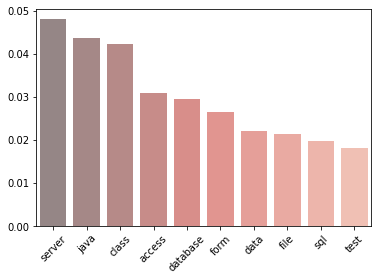

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=6,id2word=dictionary,passes=1)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

This model is actually not too bad but the number of passes is too small to completely trust it. We can focus more on a similar model with more passes as the one below. 

# 4.4 Bag of words => no_below=10, no_above=0.5, keep_n=1000, num_topics=6, passes=10

[(0,
  '0.042*"page" + 0.035*"java" + 0.033*"c" + 0.024*"asp.net" + 0.024*"custom" '
  '+ 0.023*"problem" + 0.023*"load" + 0.023*"array" + 0.021*"text" + '
  '0.020*"button"'),
 (1,
  '0.058*"value" + 0.053*"function" + 0.043*"jquery" + 0.036*"code" + '
  '0.033*"access" + 0.026*"issue" + 0.025*"type" + 0.023*"return" + '
  '0.019*"test" + 0.015*".net"'),
 (2,
  '0.043*"javascript" + 0.040*"list" + 0.039*"server" + 0.038*"way" + '
  '0.032*"sql" + 0.029*"form" + 0.029*"number" + 0.019*"name" + '
  '0.018*"display" + 0.018*"show"'),
 (3,
  '0.055*"data" + 0.041*"class" + 0.036*"php" + 0.028*"python" + 0.026*"mysql" '
  '+ 0.024*"method" + 0.020*"file" + 0.020*"view" + 0.018*"table" + '
  '0.017*"project"'),
 (4,
  '0.062*"error" + 0.046*"work" + 0.043*"application" + 0.043*"windows" + '
  '0.029*"app" + 0.028*"time" + 0.027*"service" + 0.022*"object" + '
  '0.020*"query" + 0.018*"web"'),
 (5,
  '0.052*"image" + 0.030*"android" + 0.025*"field" + 0.025*"script" + '
  '0.020*"post" + 0.018

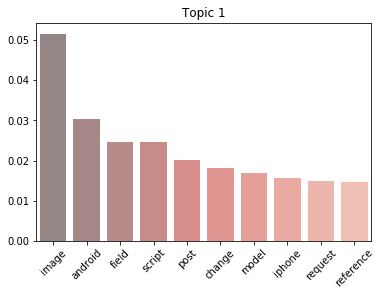

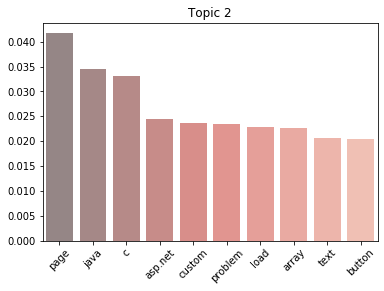

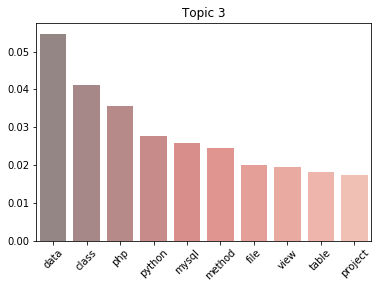

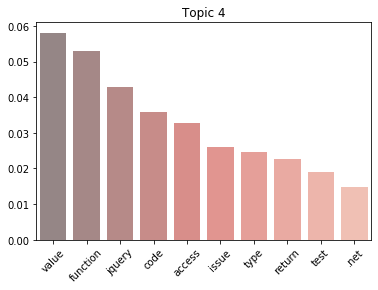

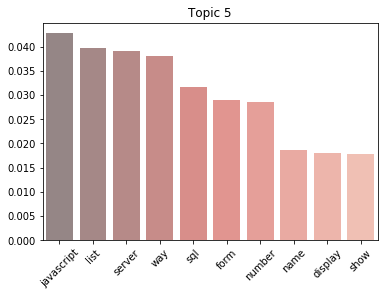

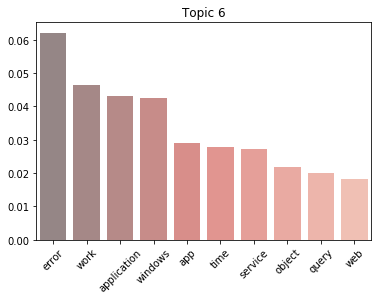

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=6,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

Probably the best set of topics so far. Topics: 

- **Topic 1**: Apps
- **Topic 2**: Image formatting, web design
- **Topic 3**: Web development (weak topic)
- **Topic 4**: Scripting
- **Topic 5**: Programming, syntax
- **Topic 6**: Databases, data, data storage

# 4.5 Bag of words => no_below=100, no_above=0.5, keep_n=1000, num_topics=6, passes=10

[(0,
  '0.073*"work" + 0.058*"image" + 0.045*"c" + 0.037*"file" + '
  '0.034*"application" + 0.034*"issue" + 0.026*"program" + 0.025*"c++" + '
  '0.019*"result" + 0.019*"need"'),
 (1,
  '0.049*"java" + 0.047*"class" + 0.042*"windows" + 0.032*"python" + '
  '0.029*"number" + 0.028*"android" + 0.027*"service" + 0.026*"function" + '
  '0.026*"show" + 0.024*"way"'),
 (2,
  '0.065*"error" + 0.029*"time" + 0.029*"asp.net" + 0.028*"custom" + '
  '0.028*"problem" + 0.028*"type" + 0.024*"control" + 0.023*"object" + '
  '0.021*"google" + 0.021*"iphone"'),
 (3,
  '0.056*"create" + 0.054*"list" + 0.040*"call" + 0.039*"view" + '
  '0.039*"javascript" + 0.029*"rail" + 0.026*"project" + 0.022*"search" + '
  '0.021*"link" + 0.018*"request"'),
 (4,
  '0.056*"php" + 0.046*"page" + 0.045*"change" + 0.040*"value" + 0.038*"code" '
  '+ 0.035*"array" + 0.028*"text" + 0.023*"html" + 0.022*"line" + '
  '0.020*"string"'),
 (5,
  '0.062*"jquery" + 0.058*"data" + 0.038*"server" + 0.031*"database" + '
  '0.030*"s

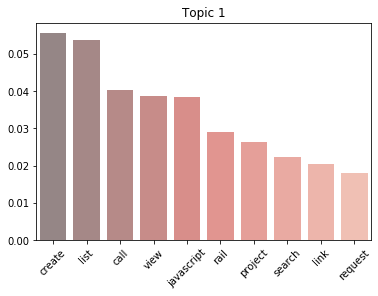

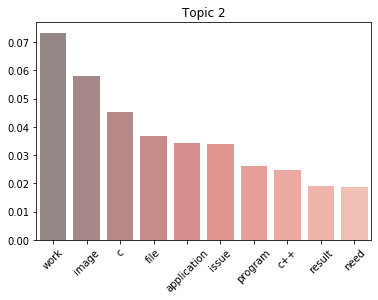

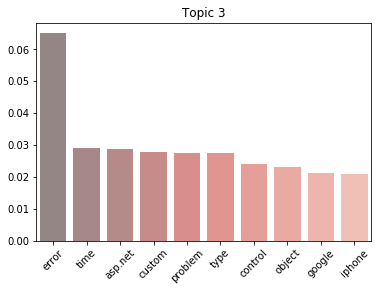

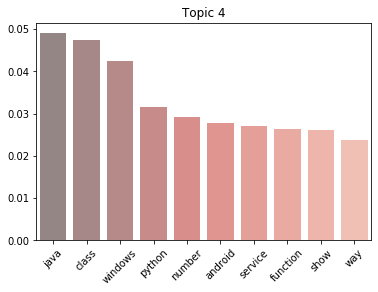

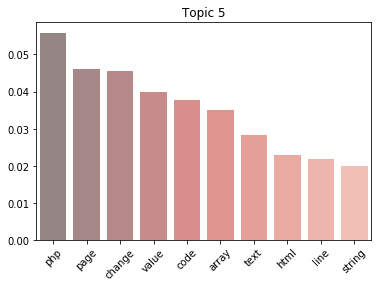

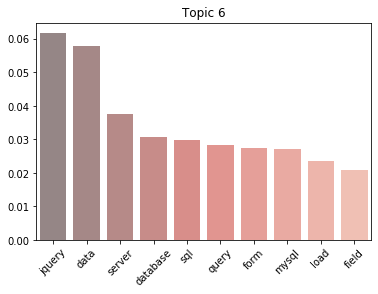

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=100, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=6,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.6 Bag of words => no_below=5, no_above=0.5, keep_n=1000, num_topics=6, passes=10

[(0,
  '0.037*"page" + 0.035*"jquery" + 0.026*"create" + 0.026*"database" + '
  '0.023*"form" + 0.023*"view" + 0.023*"text" + 0.020*"display" + 0.019*"sql" '
  '+ 0.018*"html"'),
 (1,
  '0.057*"work" + 0.042*"javascript" + 0.040*"windows" + 0.034*"array" + '
  '0.029*"call" + 0.024*"load" + 0.022*"script" + 0.021*"rail" + '
  '0.019*"command" + 0.018*"post"'),
 (2,
  '0.045*"change" + 0.037*"function" + 0.028*"app" + 0.027*"android" + '
  '0.027*"time" + 0.027*"asp.net" + 0.025*"problem" + 0.023*"value" + '
  '0.022*"control" + 0.021*"program"'),
 (3,
  '0.043*"list" + 0.041*"code" + 0.040*"c" + 0.028*"type" + 0.026*"return" + '
  '0.023*"object" + 0.022*"c++" + 0.019*"check" + 0.018*"date" + 0.017*"line"'),
 (4,
  '0.045*"class" + 0.041*"application" + 0.036*"image" + 0.031*"data" + '
  '0.029*"file" + 0.028*"number" + 0.026*"access" + 0.026*"service" + '
  '0.021*"java" + 0.020*"server"'),
 (5,
  '0.038*"error" + 0.034*"python" + 0.033*"query" + 0.031*"php" + '
  '0.030*"method" + 0.

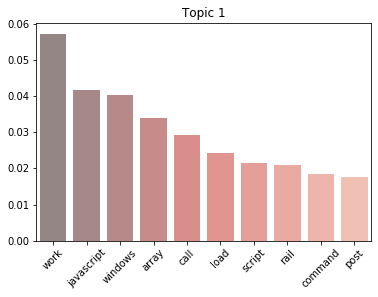

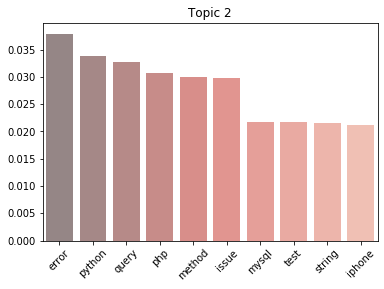

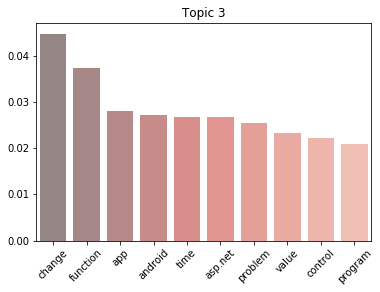

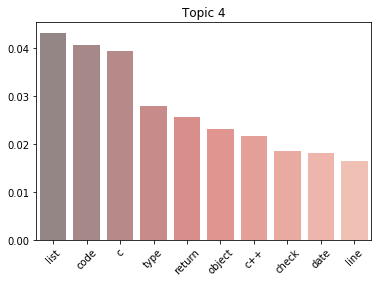

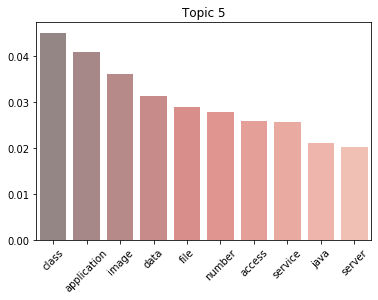

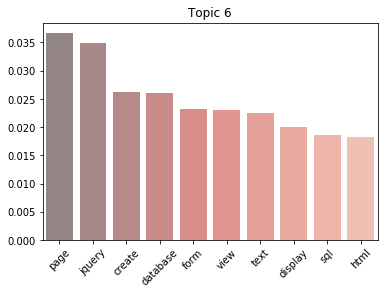

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=6,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.7 Bag of words => no_below=5, no_above=0.5, keep_n=100, num_topics=6, passes=10

[(0,
  '0.107*"create" + 0.097*"code" + 0.084*"database" + 0.080*"python" + '
  '0.077*"file" + 0.074*"number" + 0.070*"time" + 0.069*"asp.net" + '
  '0.066*"type" + 0.065*"display"'),
 (1,
  '0.159*"work" + 0.123*"page" + 0.098*"c" + 0.076*"app" + 0.061*"html" + '
  '0.055*"table" + 0.053*"test" + 0.053*"string" + 0.049*"post" + 0.048*"web"'),
 (2,
  '0.133*"jquery" + 0.125*"data" + 0.123*"error" + 0.113*"php" + '
  '0.092*"change" + 0.059*"form" + 0.057*"text" + 0.051*"load" + 0.045*"field" '
  '+ 0.044*"line"'),
 (3,
  '0.142*"function" + 0.123*"java" + 0.110*"javascript" + 0.077*"call" + '
  '0.074*"mysql" + 0.070*"method" + 0.070*"android" + 0.057*"control" + '
  '0.055*"object" + 0.053*"program"'),
 (4,
  '0.113*"value" + 0.086*"class" + 0.056*"query" + 0.053*"view" + '
  '0.051*"issue" + 0.048*"custom" + 0.048*"problem" + 0.047*"show" + '
  '0.044*"return" + 0.042*"button"'),
 (5,
  '0.102*"server" + 0.090*"image" + 0.082*"application" + 0.080*"windows" + '
  '0.077*"list" + 0.0

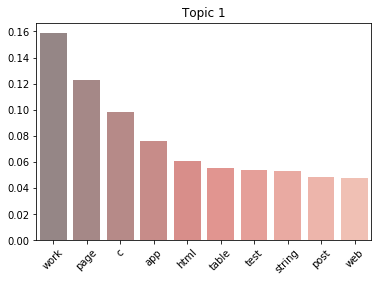

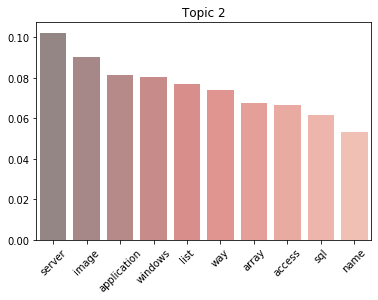

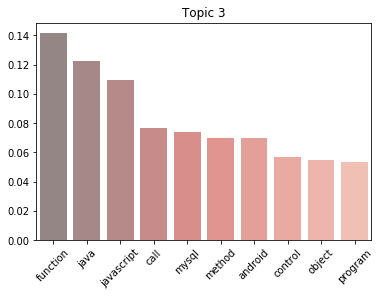

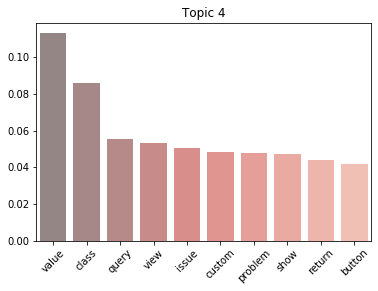

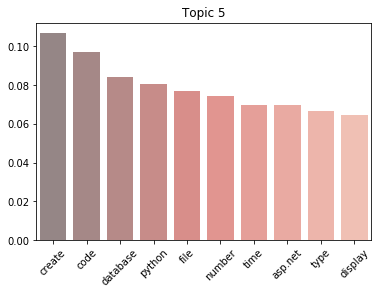

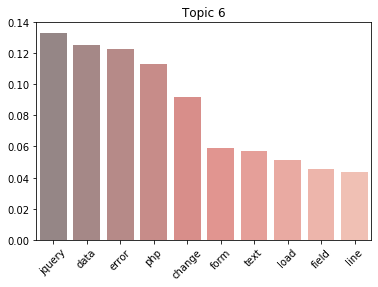

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=6,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

Not one of the best models so far. Most of the topics have a mix of keywords. No obviously distinct topics. 

# 4.8 Bag of words => no_below=10, no_above=0.5, keep_n=1000, num_topics=7, passes=10

[(0,
  '0.058*"server" + 0.041*"image" + 0.035*"database" + 0.035*"sql" + '
  '0.032*"file" + 0.031*"app" + 0.030*"name" + 0.030*"android" + 0.022*"c++" + '
  '0.021*"iphone"'),
 (1,
  '0.039*"page" + 0.033*"application" + 0.029*"issue" + 0.029*"asp.net" + '
  '0.028*"problem" + 0.027*"load" + 0.027*"display" + 0.024*"button" + '
  '0.019*"map" + 0.019*"content"'),
 (2,
  '0.059*"value" + 0.044*"data" + 0.031*"return" + 0.029*"control" + '
  '0.029*"script" + 0.026*"table" + 0.025*"project" + 0.025*"command" + '
  '0.022*"check" + 0.018*"show"'),
 (3,
  '0.052*"javascript" + 0.046*"way" + 0.035*"view" + 0.034*"number" + '
  '0.032*"time" + 0.027*"field" + 0.026*"text" + 0.024*"string" + '
  '0.023*"change" + 0.020*"date"'),
 (4,
  '0.052*"error" + 0.050*"php" + 0.037*"windows" + 0.031*"class" + '
  '0.030*"custom" + 0.027*"query" + 0.026*"mysql" + 0.021*"post" + 0.020*"row" '
  '+ 0.019*"search"'),
 (5,
  '0.061*"work" + 0.057*"function" + 0.050*"jquery" + 0.036*"array" + '
  '0.031*"c

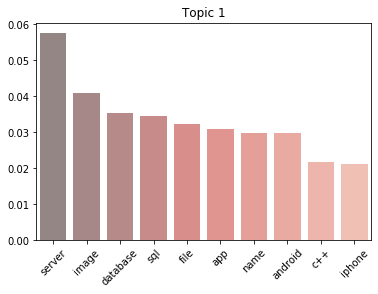

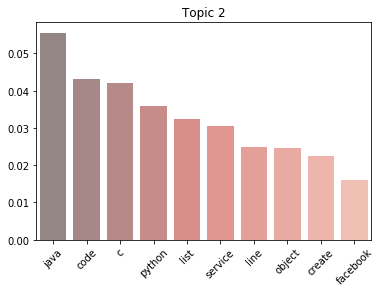

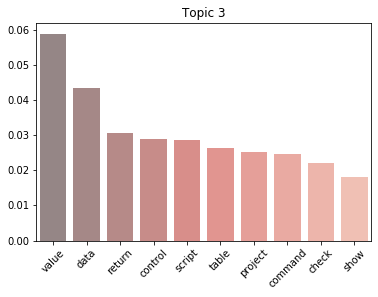

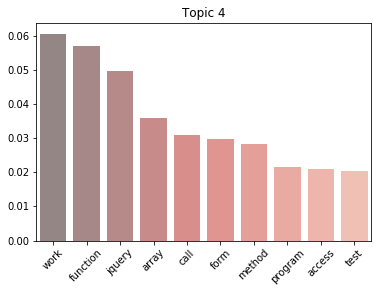

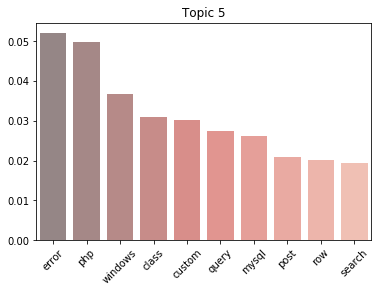

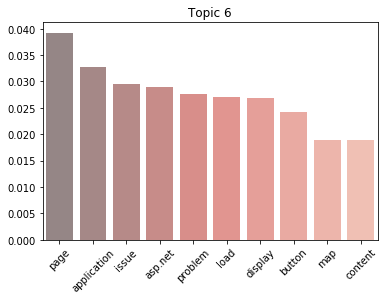

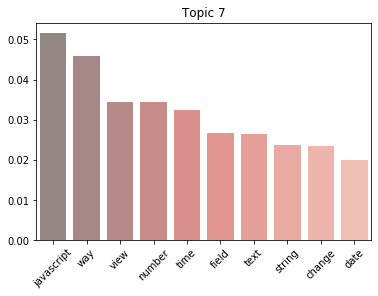

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=7,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

Switching to 7 topics instead of 6 distorted the topics a little. We will stick with the 6 topics for now. 

## TFIDF

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
i = 0
for doc in corpus_tfidf:
    i = i+1
    pprint.pprint(doc)
    if i==5:
        break

[(0, 0.6380047314363722), (1, 0.5016485056449408), (2, 0.5842077879051257)]
[(3, 0.565251639921631), (4, 0.6261169956983257), (5, 0.5370922558216695)]
[(2, 0.4910368453884094),
 (6, 0.39654357171903315),
 (7, 0.4472752142445557),
 (8, 0.6337041067578765)]
[(9, 0.6511999331492017), (10, 0.758906217570047)]
[(11, 0.703350259697448), (12, 0.7108434512489599)]


In [0]:
df['Title'].head()

0           [check, image, mime, type]
1    [prevent, firefox, press, ctrl-w]
2               [r, error, type, list]
3                     [character, url]
4                    [contact, detail]
Name: Title, dtype: object

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
i = 0
for doc in corpus_tfidf:
    i = i+1
    pprint.pprint(doc)
    if i==5:
        break
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=5,id2word=dictionary,passes=100)
pprint.pprint (lda.print_topics())

[(0, 0.6380047314363722), (1, 0.5016485056449408), (2, 0.5842077879051257)]
[(3, 0.565251639921631), (4, 0.6261169956983257), (5, 0.5370922558216695)]
[(2, 0.4910368453884094),
 (6, 0.39654357171903315),
 (7, 0.4472752142445557),
 (8, 0.6337041067578765)]
[(9, 0.6511999331492017), (10, 0.758906217570047)]
[(11, 0.703350259697448), (12, 0.7108434512489599)]
[(0,
  '0.026*"c" + 0.020*"time" + 0.016*"program" + 0.016*"windows" + '
  '0.016*"object" + 0.014*"question" + 0.013*"check" + 0.013*"row" + '
  '0.012*"field" + 0.012*"php"'),
 (1,
  '0.035*"function" + 0.030*"jquery" + 0.028*"javascript" + 0.020*"call" + '
  '0.019*"method" + 0.017*"return" + 0.017*"show" + 0.015*"html" + '
  '0.015*"form" + 0.014*"page"'),
 (2,
  '0.027*"server" + 0.023*"database" + 0.022*"issue" + 0.022*"query" + '
  '0.021*"sql" + 0.020*"view" + 0.019*"asp.net" + 0.018*"value" + '
  '0.018*"class" + 0.017*"list"'),
 (3,
  '0.022*"number" + 0.022*"application" + 0.021*"problem" + 0.019*"service" + '
  '0.016*"li

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=8, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
i = 0
for doc in corpus_tfidf:
    i = i+1
    pprint.pprint(doc)
    if i==5:
        break
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=5,id2word=dictionary,passes=50)
pprint.pprint (lda.print_topics())

[(0, 0.6380047314363722), (1, 0.5016485056449408), (2, 0.5842077879051257)]
[(3, 0.565251639921631), (4, 0.6261169956983257), (5, 0.5370922558216695)]
[(2, 0.4910368453884094),
 (6, 0.39654357171903315),
 (7, 0.4472752142445557),
 (8, 0.6337041067578765)]
[(9, 0.6511999331492017), (10, 0.758906217570047)]
[(11, 0.703350259697448), (12, 0.7108434512489599)]
[(0,
  '0.032*"class" + 0.026*"c" + 0.018*"return" + 0.018*"number" + '
  '0.016*"control" + 0.015*"javascript" + 0.015*"method" + 0.015*"asp.net" + '
  '0.015*"test" + 0.014*"value"'),
 (1,
  '0.021*"database" + 0.021*"error" + 0.020*"query" + 0.020*"mysql" + '
  '0.019*"file" + 0.017*"create" + 0.015*"data" + 0.015*"line" + 0.015*"rail" '
  '+ 0.015*"string"'),
 (2,
  '0.031*"windows" + 0.022*"issue" + 0.016*"object" + 0.016*"server" + '
  '0.014*"question" + 0.014*"text" + 0.013*"list" + 0.013*"date" + '
  '0.012*".net" + 0.012*"need"'),
 (3,
  '0.040*"work" + 0.032*"jquery" + 0.031*"image" + 0.025*"array" + '
  '0.022*"python" + 

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
i = 0
for doc in corpus_tfidf:
    i = i+1
    pprint.pprint(doc)
    if i==5:
        break
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=5,id2word=dictionary,passes=50)
pprint.pprint (lda.print_topics())

[(0, 0.6380047314363722), (1, 0.5016485056449408), (2, 0.5842077879051257)]
[(3, 0.565251639921631), (4, 0.6261169956983257), (5, 0.5370922558216695)]
[(2, 0.4910368453884094),
 (6, 0.39654357171903315),
 (7, 0.4472752142445557),
 (8, 0.6337041067578765)]
[(9, 0.6511999331492017), (10, 0.758906217570047)]
[(11, 0.703350259697448), (12, 0.7108434512489599)]
[(0,
  '0.031*"function" + 0.031*"page" + 0.023*"jquery" + 0.022*"problem" + '
  '0.021*"form" + 0.020*"load" + 0.019*"windows" + 0.018*"field" + '
  '0.017*"call" + 0.015*"question"'),
 (1,
  '0.028*"class" + 0.025*"error" + 0.023*"array" + 0.021*"python" + '
  '0.020*"list" + 0.019*"query" + 0.019*"mysql" + 0.019*"work" + 0.019*"sql" + '
  '0.017*"data"'),
 (2,
  '0.028*"way" + 0.019*"c" + 0.017*"create" + 0.017*"button" + 0.017*"text" + '
  '0.016*"time" + 0.016*"table" + 0.016*"iphone" + 0.015*"android" + '
  '0.014*"row"'),
 (3,
  '0.027*"php" + 0.026*"code" + 0.023*"issue" + 0.023*"number" + 0.018*"image" '
  '+ 0.017*"line" + 

# 4.9 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=6, passes=10

[(0,
  '0.035*"function" + 0.026*"jquery" + 0.023*"form" + 0.022*"error" + '
  '0.021*"return" + 0.020*"issue" + 0.019*"call" + 0.019*"view" + '
  '0.018*"button" + 0.018*"rail"'),
 (1,
  '0.025*"python" + 0.023*"query" + 0.022*"sql" + 0.022*"mysql" + 0.022*"list" '
  '+ 0.019*"work" + 0.019*"server" + 0.018*"program" + 0.018*"database" + '
  '0.017*"line"'),
 (2,
  '0.028*"problem" + 0.021*"object" + 0.020*"test" + 0.020*"windows" + '
  '0.019*"service" + 0.019*"project" + 0.018*"map" + 0.018*"code" + '
  '0.015*"access" + 0.015*"google"'),
 (3,
  '0.035*"class" + 0.033*"image" + 0.020*"c++" + 0.018*"change" + '
  '0.017*"question" + 0.017*"content" + 0.016*"size" + 0.015*"memory" + '
  '0.014*"space" + 0.014*"studio"'),
 (4,
  '0.025*"method" + 0.024*"page" + 0.024*"load" + 0.023*"number" + '
  '0.022*"control" + 0.021*"html" + 0.017*"post" + 0.016*"xml" + 0.014*"json" '
  '+ 0.013*"request"'),
 (5,
  '0.030*"array" + 0.027*"c" + 0.024*"file" + 0.023*"value" + 0.023*"time" + '
  '0.0

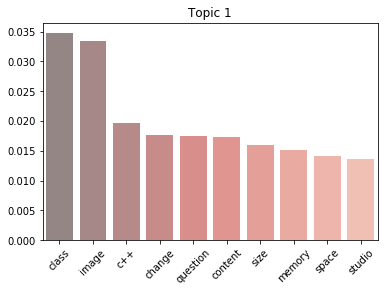

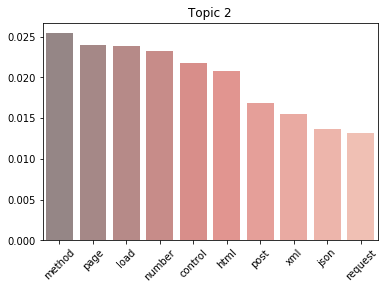

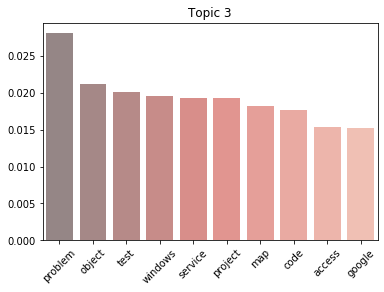

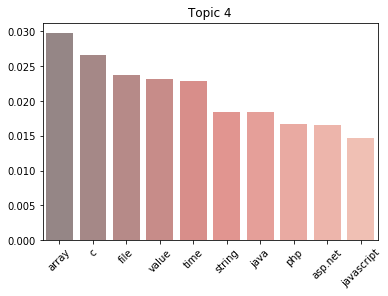

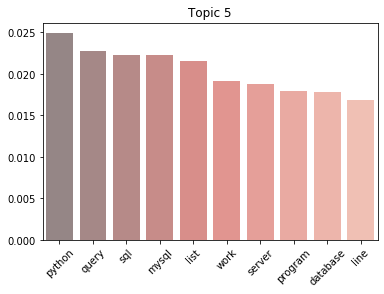

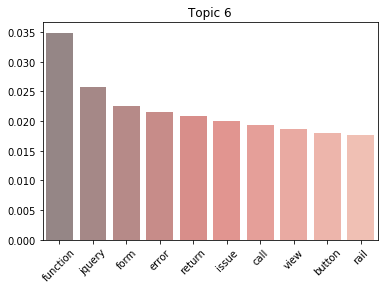

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=6,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

- Topic 1: Memory
- Topic 2: Web data, API
- Topic 3: Web apps
- Topic 4: Programming, web development
- Topic 5: Databases, data analysis, data storage
- Topic 6: Web development 

# 4.10 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=10, passes=10

[(0,
  '0.058*"class" + 0.057*"list" + 0.048*"function" + 0.037*"load" + '
  '0.035*"error" + 0.032*"name" + 0.032*"line" + 0.029*"command" + '
  '0.022*"space" + 0.022*"studio"'),
 (1,
  '0.039*"query" + 0.035*"application" + 0.034*"mysql" + 0.027*"table" + '
  '0.023*"row" + 0.023*"search" + 0.022*"xml" + 0.021*"data" + 0.020*"linux" + '
  '0.020*"ios"'),
 (2,
  '0.042*"code" + 0.031*"show" + 0.031*"script" + 0.026*"content" + '
  '0.025*"page" + 0.022*"text" + 0.021*"display" + 0.021*"change" + '
  '0.019*"css" + 0.019*"model"'),
 (3,
  '0.037*"problem" + 0.033*"return" + 0.032*"value" + 0.029*"python" + '
  '0.029*"field" + 0.028*"html" + 0.028*"rail" + 0.027*"control" + '
  '0.027*"form" + 0.024*"pass"'),
 (4,
  '0.053*"c" + 0.038*"array" + 0.034*"program" + 0.031*"call" + 0.027*"map" + '
  '0.027*"google" + 0.025*"file" + 0.025*"link" + 0.024*"iphone" + '
  '0.021*"format"'),
 (5,
  '0.039*"windows" + 0.038*"number" + 0.034*"method" + 0.030*"jquery" + '
  '0.027*"question" + 0.02

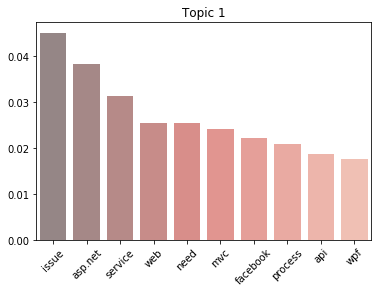

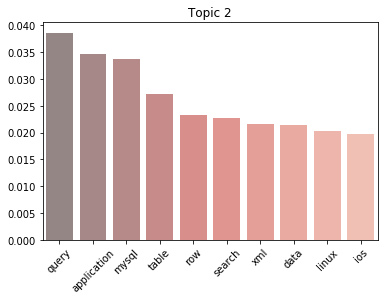

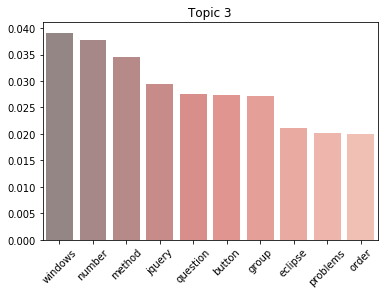

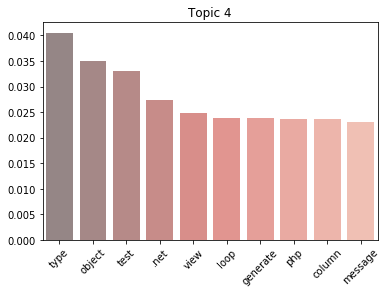

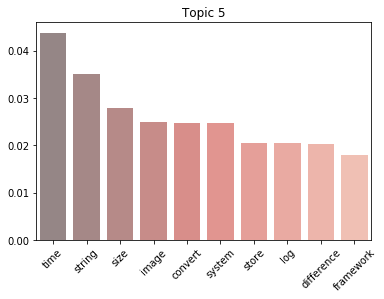

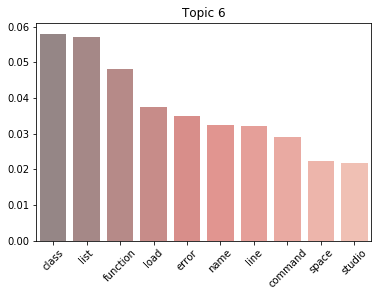

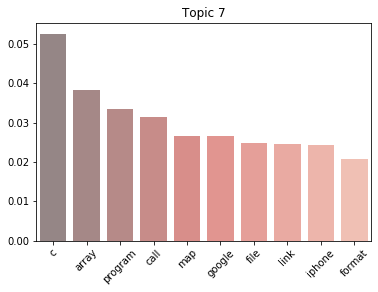

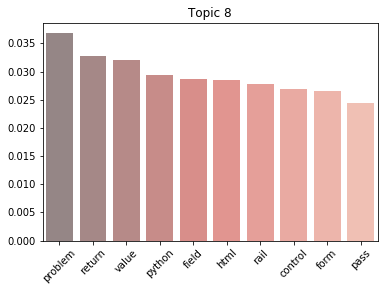

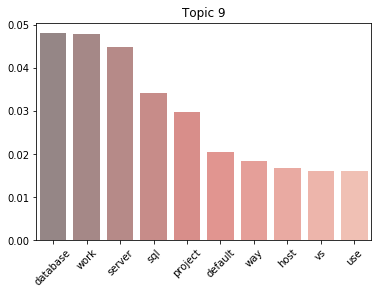

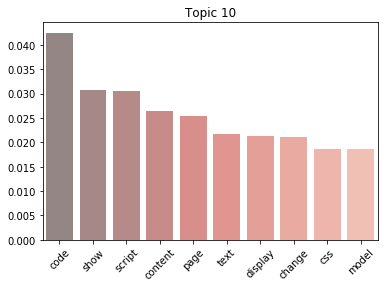

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=10,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.11 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=8, passes=10

[(0,
  '0.035*"work" + 0.033*"query" + 0.032*"mysql" + 0.031*"form" + '
  '0.026*"method" + 0.026*"name" + 0.025*"error" + 0.021*"program" + '
  '0.020*"jquery" + 0.020*"data"'),
 (1,
  '0.042*"class" + 0.037*"python" + 0.028*"type" + 0.024*"object" + '
  '0.024*"java" + 0.024*"windows" + 0.022*"project" + 0.021*"string" + '
  '0.019*"link" + 0.017*"convert"'),
 (2,
  '0.032*"asp.net" + 0.031*"service" + 0.023*"content" + 0.023*"group" + '
  '0.021*"web" + 0.020*"model" + 0.020*"mvc" + 0.017*"request" + 0.017*"call" '
  '+ 0.017*"django"'),
 (3,
  '0.049*"function" + 0.032*"javascript" + 0.027*"return" + 0.026*"number" + '
  '0.023*"android" + 0.023*"line" + 0.022*"view" + 0.021*"command" + '
  '0.016*"pass" + 0.016*"button"'),
 (4,
  '0.037*"issue" + 0.031*"server" + 0.029*"control" + 0.029*"application" + '
  '0.027*"file" + 0.025*"iphone" + 0.024*"database" + 0.023*"question" + '
  '0.023*"sql" + 0.022*"app"'),
 (5,
  '0.038*"image" + 0.027*"display" + 0.025*"text" + 0.025*"html" + 

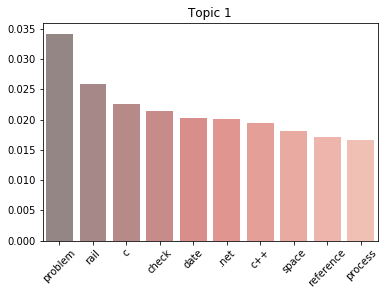

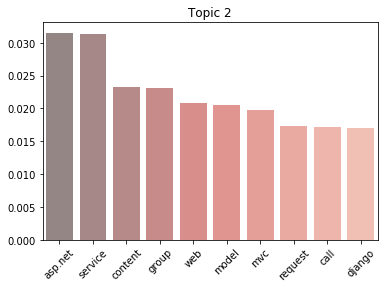

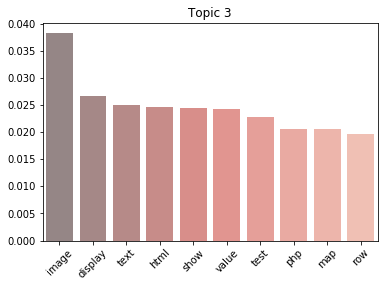

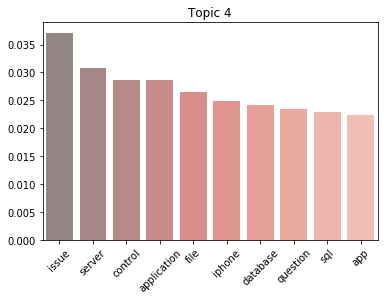

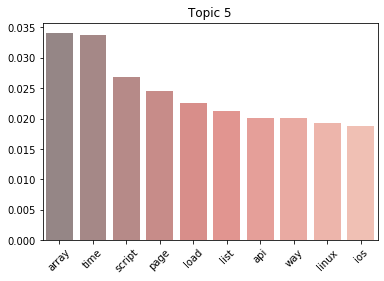

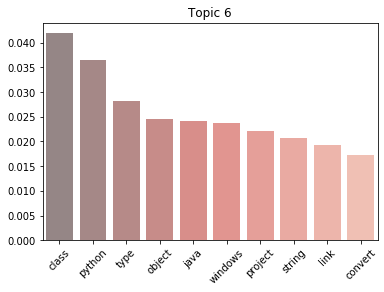

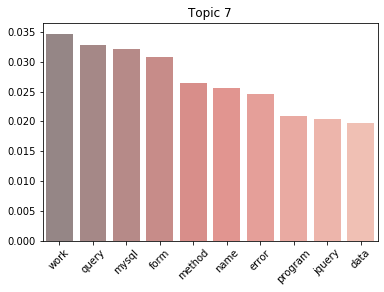

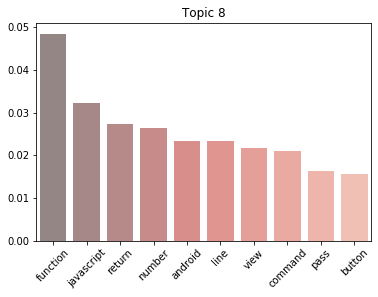

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=8,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.12 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=20, passes=10 **BASELINE MODEL**

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

[(0,
  '0.068*"query" + 0.051*".net" + 0.051*"need" + 0.049*"help" + 0.045*"studio" '
  '+ 0.043*"event" + 0.042*"django" + 0.040*"variables" + 0.036*"sort" + '
  '0.034*"join"'),
 (1,
  '0.160*"work" + 0.068*"page" + 0.053*"content" + 0.048*"search" + '
  '0.039*"output" + 0.038*"connection" + 0.036*"character" + 0.030*"browser" + '
  '0.029*"word" + 0.027*"cache"'),
 (2,
  '0.105*"windows" + 0.073*"return" + 0.054*"question" + 0.053*"group" + '
  '0.043*"ios" + 0.042*"facebook" + 0.038*"store" + 0.035*"record" + '
  '0.035*"api" + 0.033*"parse"'),
 (3,
  '0.112*"code" + 0.093*"call" + 0.069*"c++" + 0.048*"loop" + 0.046*"value" + '
  '0.043*"css" + 0.043*"element" + 0.027*"excel" + 0.024*"import" + '
  '0.023*"place"'),
 (4,
  '0.047*"php" + 0.046*"system" + 0.037*"property" + 0.034*"session" + '
  '0.034*"menu" + 0.033*"date" + 0.033*"start" + 0.032*"limit" + '
  '0.031*"document" + 0.030*"crash"'),
 (5,
  '0.122*"list" + 0.080*"load" + 0.079*"show" + 0.045*"html" + 0.044*"request" '

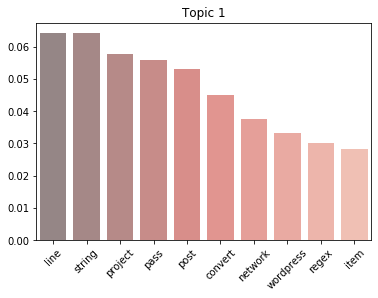

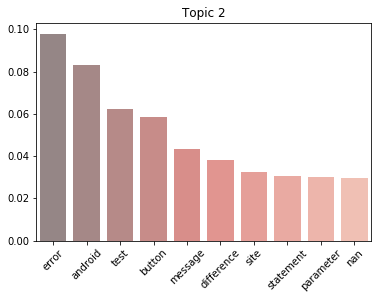

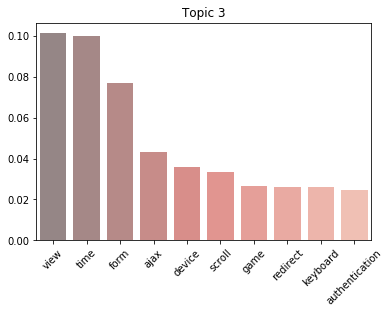

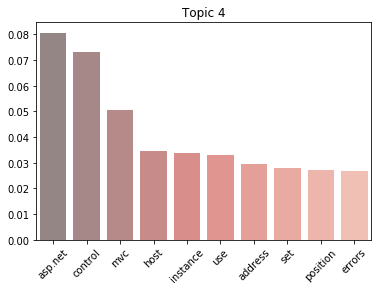

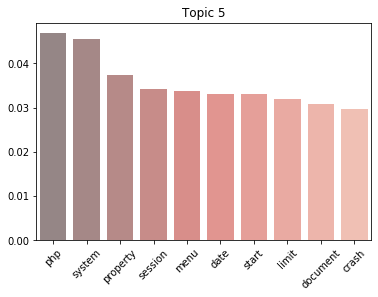

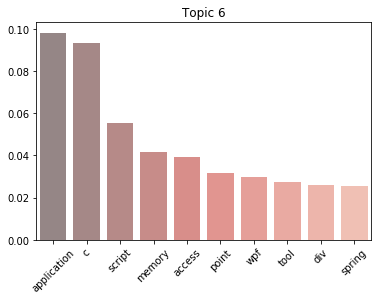

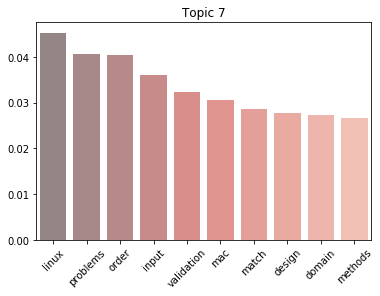

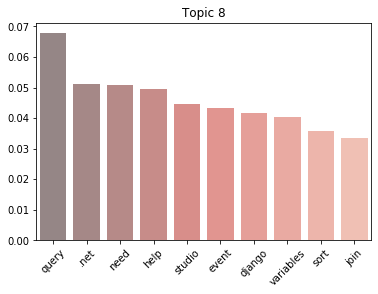

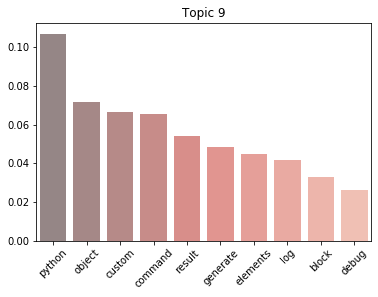

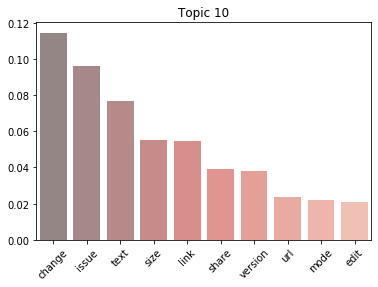

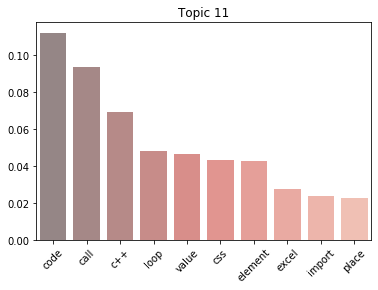

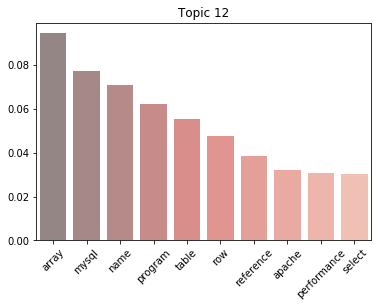

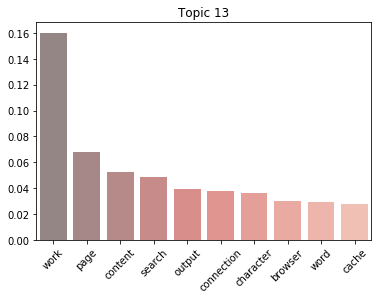

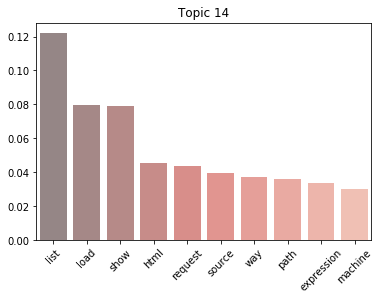

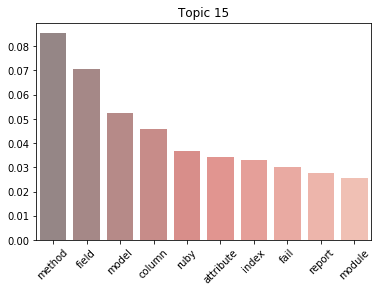

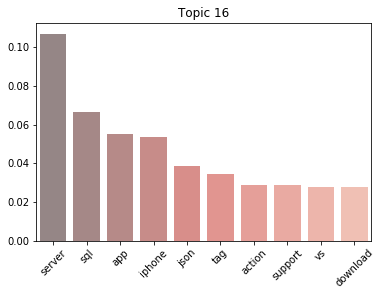

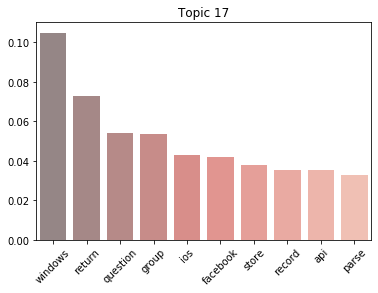

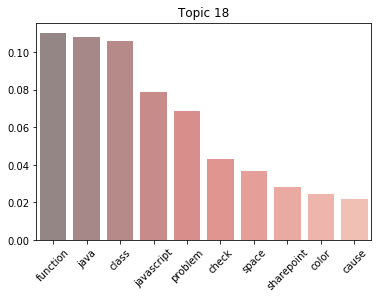

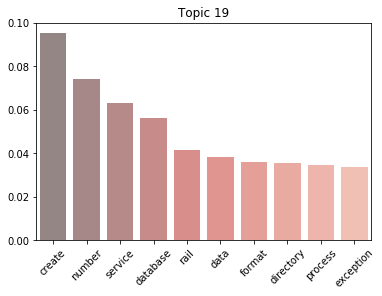

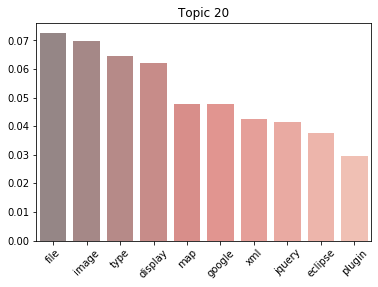

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=20,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.12.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# 4.13 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=50, passes=10

[(11,
  '0.231*"line" + 0.080*"force" + 0.069*"columns" + 0.063*"bash" + '
  '0.063*"build" + 0.057*"resource" + 0.041*"popup" + 0.040*"audio" + '
  '0.035*"focus" + 0.033*"clause"'),
 (3,
  '0.120*"facebook" + 0.102*"point" + 0.082*"statement" + 0.080*"cache" + '
  '0.071*"information" + 0.062*"library" + 0.061*"drop" + 0.056*"setup" + '
  '0.052*"level" + 0.033*"callback"'),
 (18,
  '0.124*"generate" + 0.112*"css" + 0.097*"session" + 0.082*"machine" + '
  '0.079*"domain" + 0.059*"place" + 0.056*"implement" + 0.042*"checkbox" + '
  '0.040*"feature" + 0.039*"fix"'),
 (43,
  '0.257*"page" + 0.088*"elements" + 0.084*"web" + 0.073*"wordpress" + '
  '0.064*"filter" + 0.062*"fail" + 0.062*"design" + 0.052*"computer" + '
  '0.048*"handle" + 0.039*"linq"'),
 (44,
  '0.275*"query" + 0.127*"exception" + 0.096*"regex" + 0.060*"dialog" + '
  '0.055*"configuration" + 0.036*"float" + 0.035*"exist" + 0.031*"extract" + '
  '0.031*"specify" + 0.030*"azure"'),
 (21,
  '0.237*"rail" + 0.129*"ajax" + 0.1

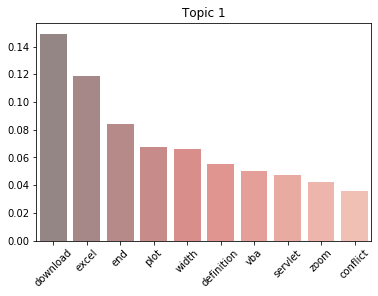

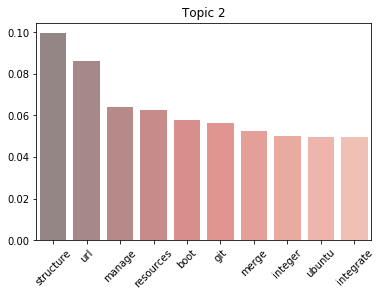

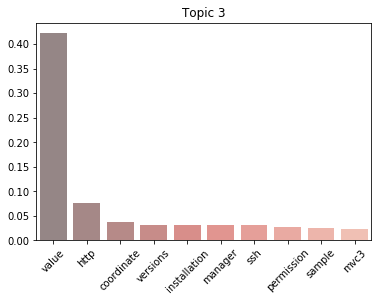

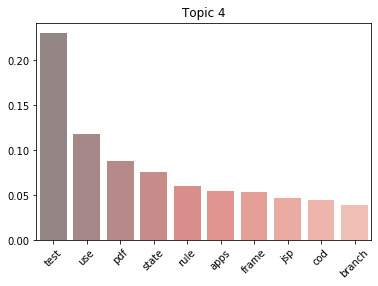

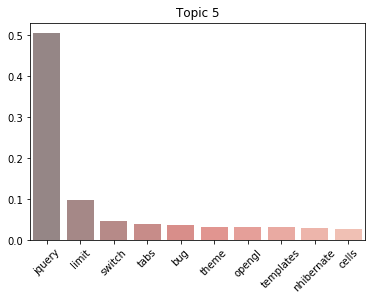

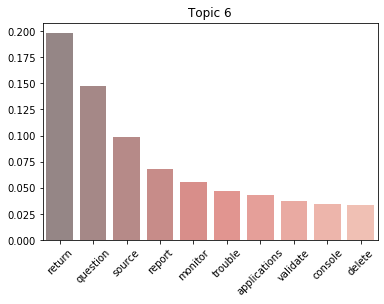

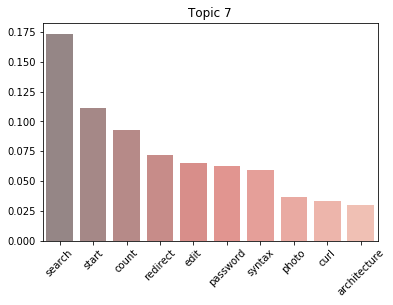

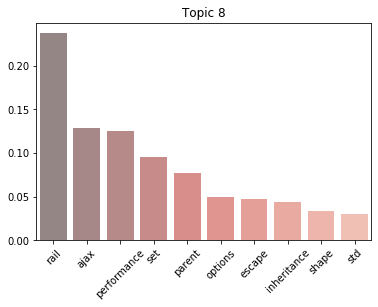

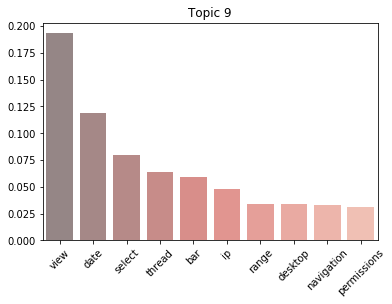

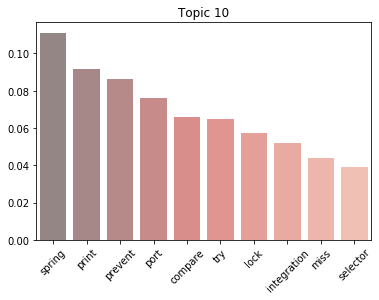

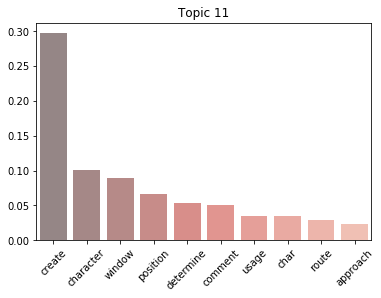

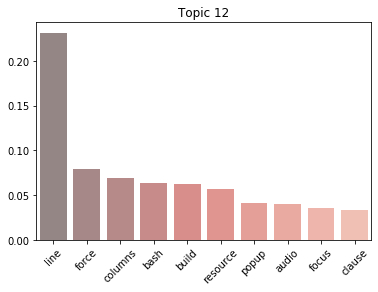

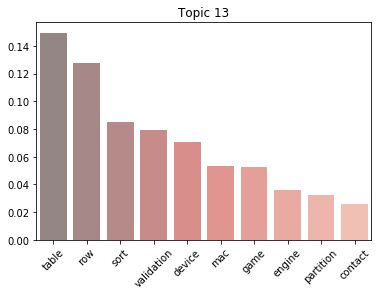

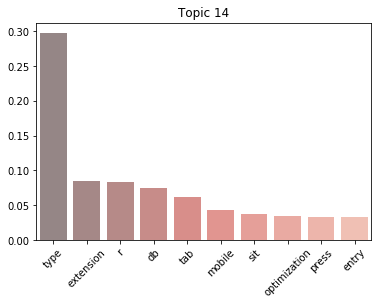

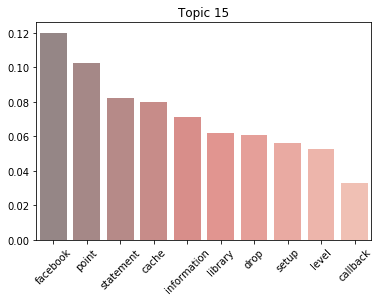

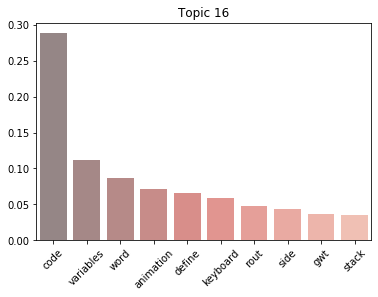

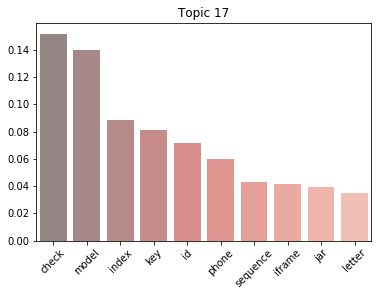

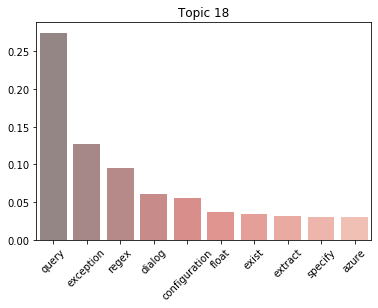

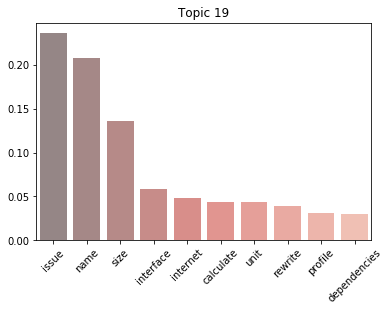

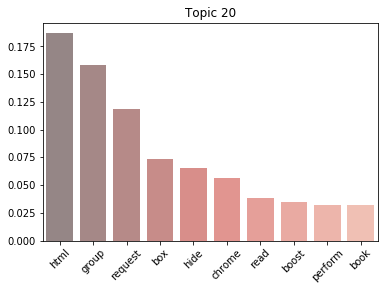

In [0]:
#@title
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=50,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.13.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# 4.14 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=100, passes=10

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(62,
  '0.240*"connection" + 0.229*"network" + 0.178*"spring" + 0.135*"library" + '
  '0.078*"constructor" + 0.056*"leak" + 0.043*"sqlite" + 0.033*"memory" + '
  '0.000*"debug" + 0.000*"adobe"'),
 (66,
  '0.304*"web" + 0.189*"index" + 0.171*"bind" + 0.135*"connect" + '
  '0.094*"html5" + 0.064*"widget" + 0.034*"put" + 0.000*"nhibernate" + '
  '0.000*"debug" + 0.000*"adobe"'),
 (39,
  '0.607*"javascript" + 0.078*"resource" + 0.072*"conversion" + '
  '0.066*"repository" + 0.063*"integer" + 0.056*"ssl" + 0.026*"please" + '
  '0.025*"reader" + 0.000*"debug" + 0.000*"nhibernate"'),
 (95,
  '0.304*"studio" + 0.220*"limit" + 0.201*"cache" + 0.087*"textbox" + '
  '0.086*"int" + 0.058*"deny" + 0.035*"translate" + 0.000*"nhibernate" + '
  '0.000*"jpa" + 0.000*"as3"'),
 (42,
  '0.219*"attribute" + 0.168*"excel" + 0.142*"disk" + 0.136*"state" + '
  '0.086*"panel" + 0.082*"section" + 0.061*"namespace" + 0.050*"xpath" + '
  '0.048*"encryption" + 0.000*"debug"'),
 (61,
  '0.221*"post" + 0.187*"syste

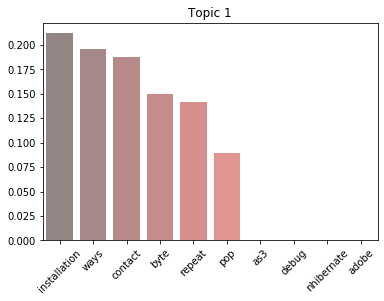

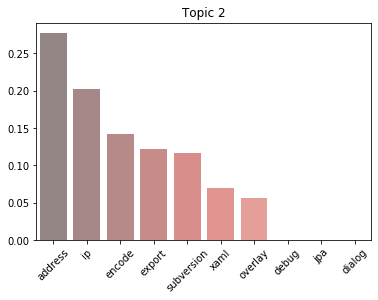

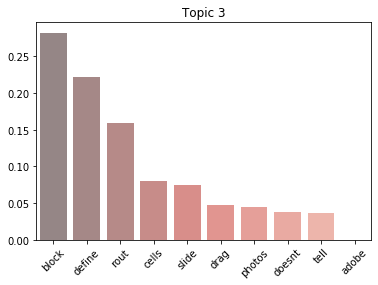

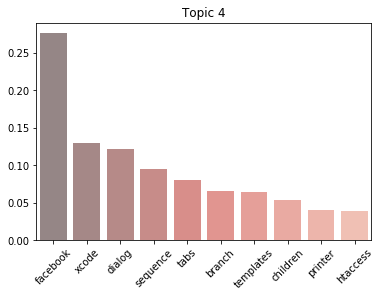

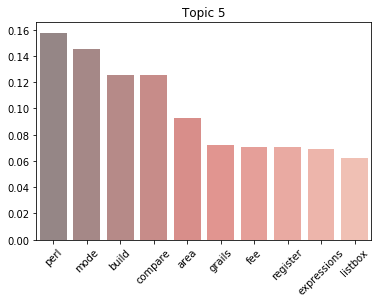

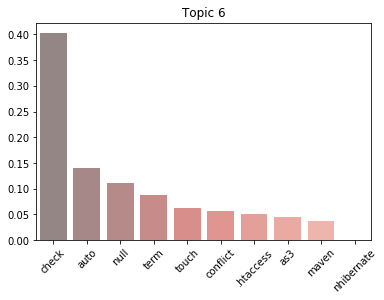

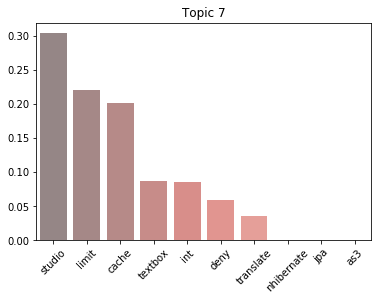

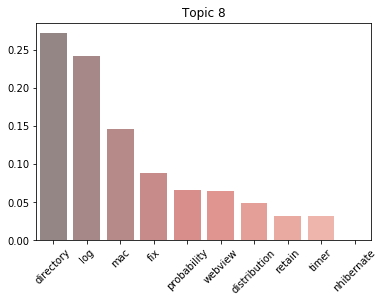

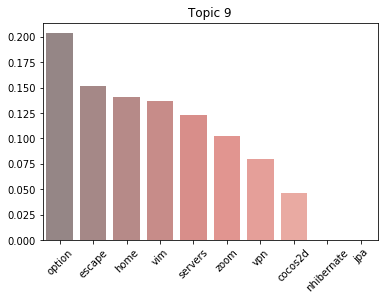

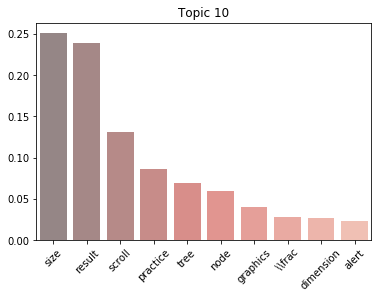

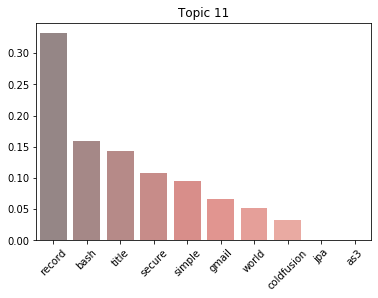

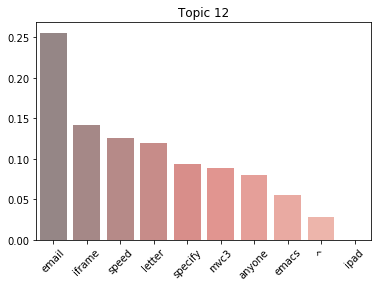

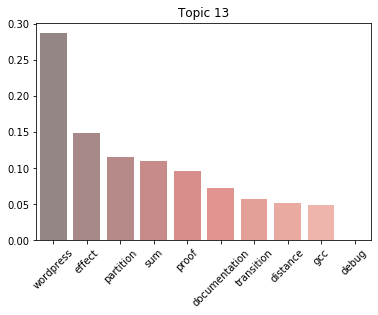

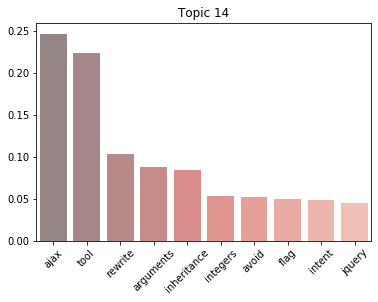

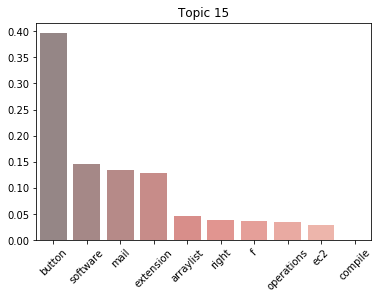

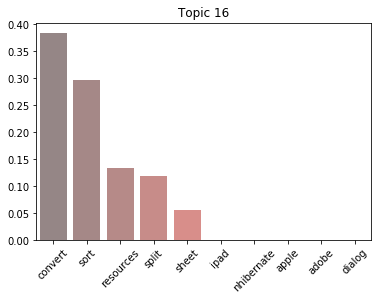

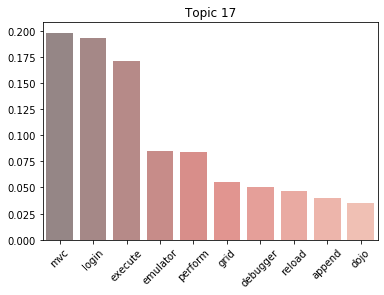

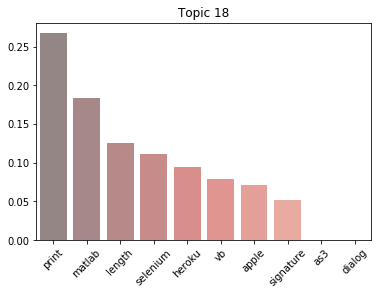

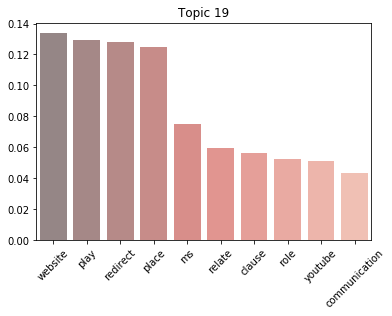

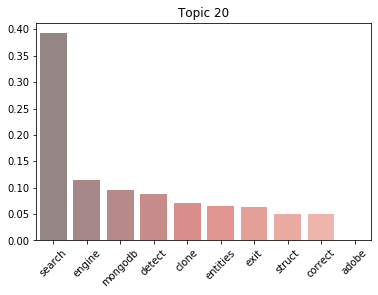

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=100,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 4.15 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=200, passes=10

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(5,
  '0.331*"transaction" + 0.263*"chart" + 0.209*"commit" + 0.182*"max" + '
  '0.000*"jpa" + 0.000*"debug" + 0.000*"nhibernate" + 0.000*"adobe" + '
  '0.000*"as3" + 0.000*"ipad"'),
 (143,
  '0.746*"parse" + 0.144*"paths" + 0.096*"svg" + 0.000*"nhibernate" + '
  '0.000*"as3" + 0.000*"adobe" + 0.000*"dialog" + 0.000*"debug" + '
  '0.000*"directories" + 0.000*"redirect"'),
 (183,
  '0.434*"x" + 0.143*"ubuntu" + 0.116*"selection" + 0.090*"volume" + '
  '0.080*"mount" + 0.073*"restart" + 0.057*"vm" + 0.000*"understand" + '
  '0.000*"redirect" + 0.000*"as3"'),
 (168,
  '0.608*"elements" + 0.263*"environment" + 0.120*"cast" + 0.000*"dialog" + '
  '0.000*"nhibernate" + 0.000*"directories" + 0.000*"compile" + 0.000*"adobe" '
  '+ 0.000*"upload" + 0.000*"understand"'),
 (19,
  '0.503*"base" + 0.318*"tool" + 0.118*"ssh" + 0.055*"mvvm" + 0.000*"ipad" + '
  '0.000*"apple" + 0.000*"jpa" + 0.000*"as3" + 0.000*"understand" + '
  '0.000*"redirect"'),
 (50,
  '0.238*"emulator" + 0.224*"calendar" + 0.

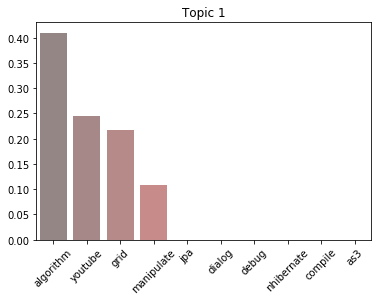

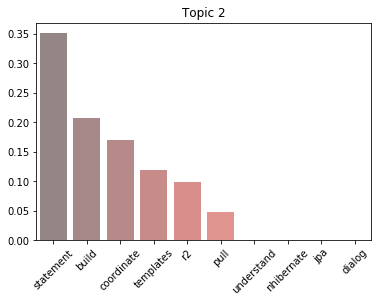

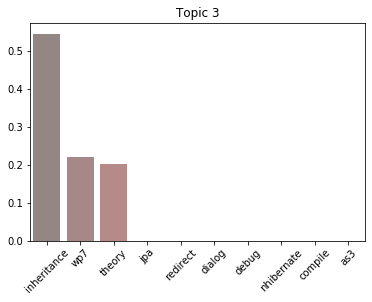

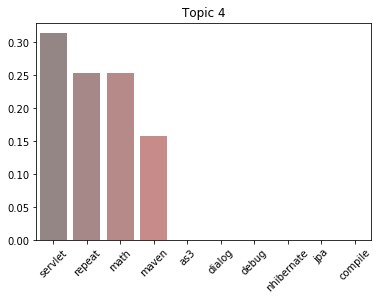

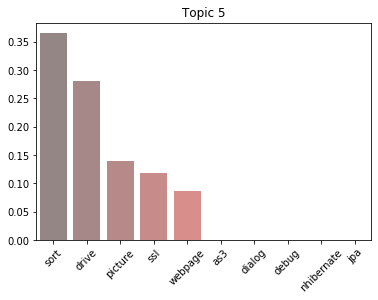

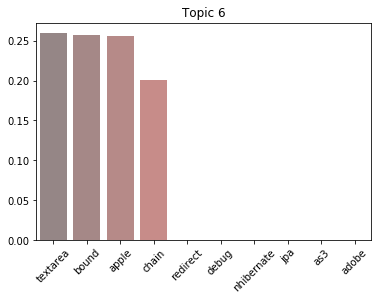

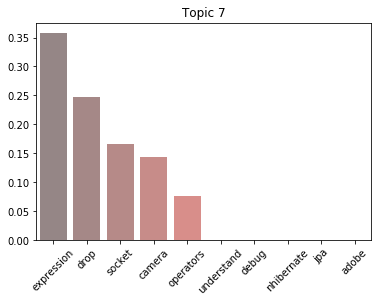

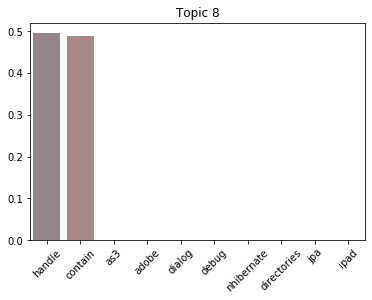

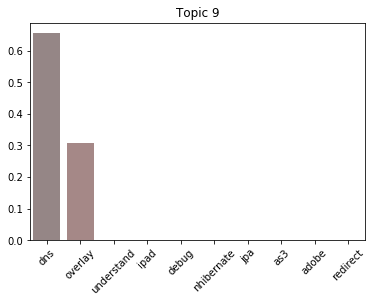

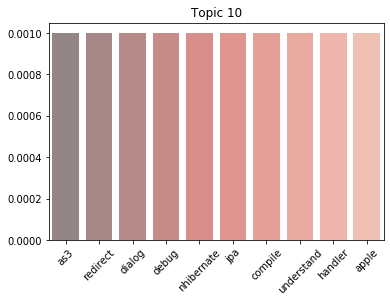

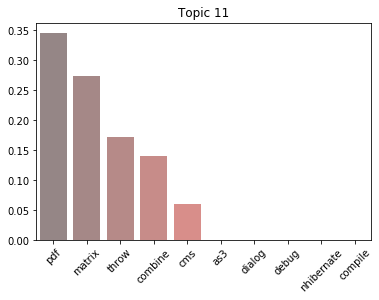

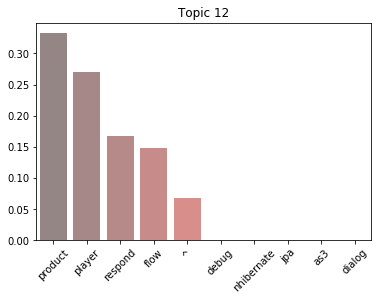

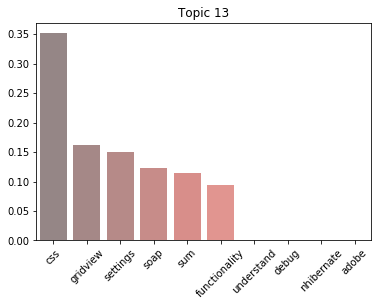

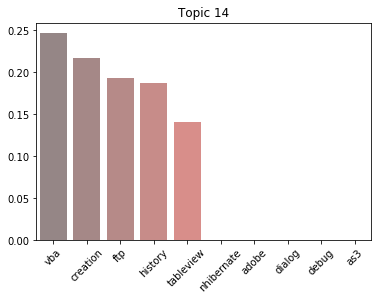

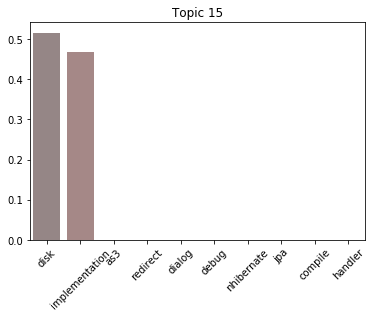

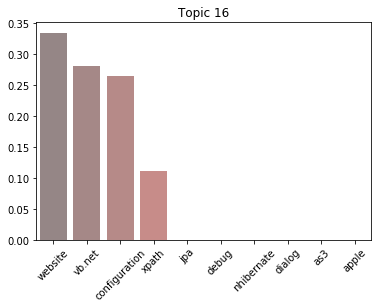

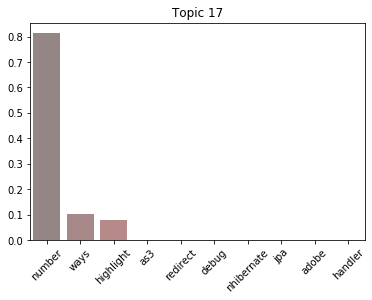

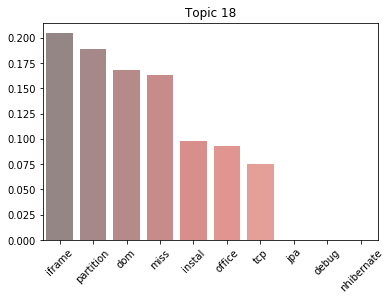

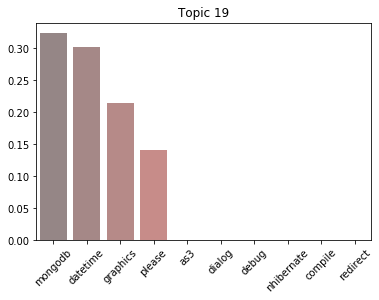

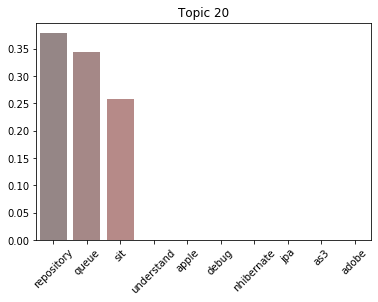

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=200,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.15.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# 4.16 TFIDF => no_below=10, no_above=0.5, keep_n=1000, topics=150, passes=10

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(90,
  '0.358*"display" + 0.279*"group" + 0.117*"define" + 0.094*"break" + '
  '0.089*"js" + 0.058*"throw" + 0.000*"as3" + 0.000*"dialog" + 0.000*"debug" + '
  '0.000*"nhibernate"'),
 (138,
  '0.257*"mail" + 0.244*"parent" + 0.195*"child" + 0.139*"home" + '
  '0.110*"theorem" + 0.045*"distribute" + 0.000*"dialog" + 0.000*"debug" + '
  '0.000*"nhibernate" + 0.000*"jpa"'),
 (56,
  '0.656*"error" + 0.224*"map" + 0.081*"authentication" + 0.035*"listbox" + '
  '0.000*"nhibernate" + 0.000*"compile" + 0.000*"adobe" + 0.000*"dialog" + '
  '0.000*"debug" + 0.000*"understand"'),
 (75,
  '0.290*"object" + 0.197*"generate" + 0.168*"point" + 0.131*"cache" + '
  '0.113*"collection" + 0.060*"mean" + 0.038*"exit" + 0.000*"jpa" + '
  '0.000*"debug" + 0.000*"nhibernate"'),
 (135,
  '0.260*"character" + 0.254*"source" + 0.148*"url" + 0.146*"import" + '
  '0.084*"ms" + 0.060*"cookie" + 0.043*"controllers" + 0.000*"understand" + '
  '0.000*"redirect" + 0.000*"compile"'),
 (114,
  '0.654*"value" + 0.123*"s

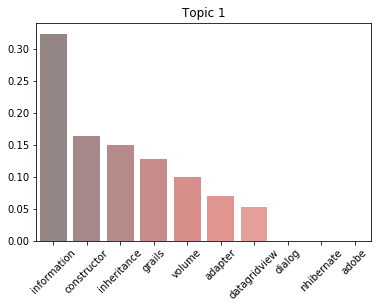

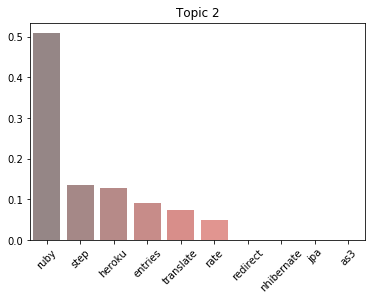

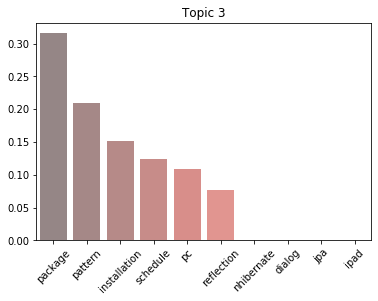

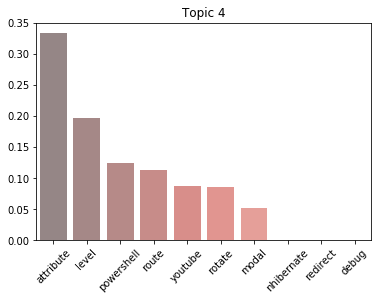

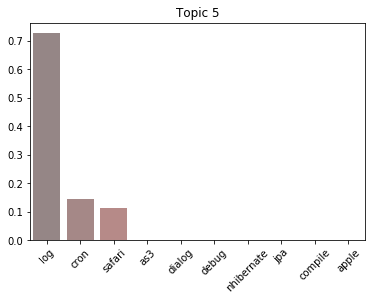

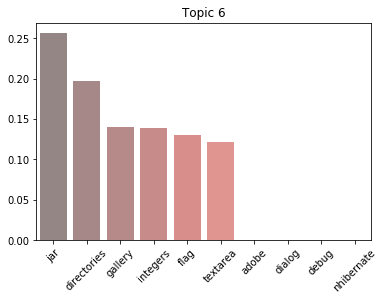

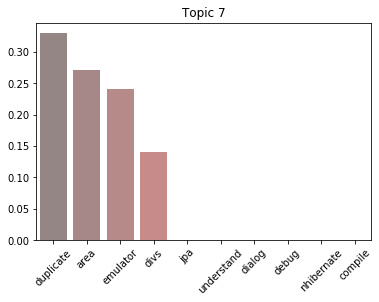

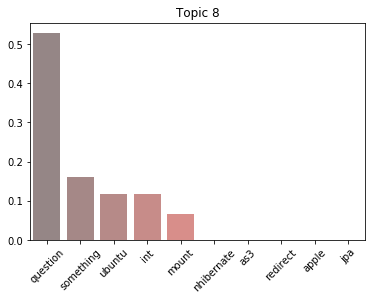

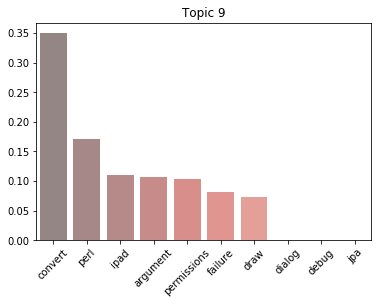

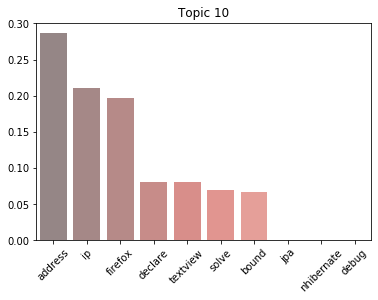

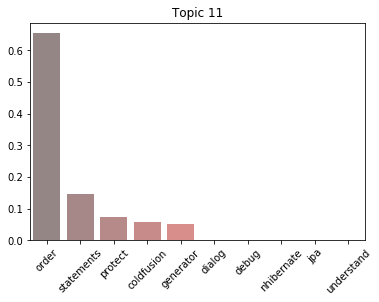

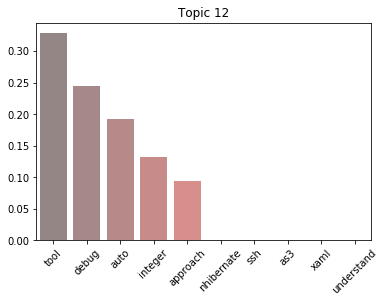

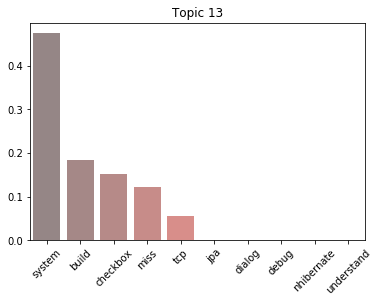

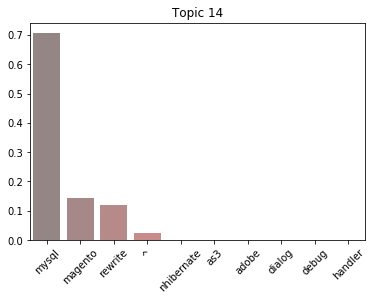

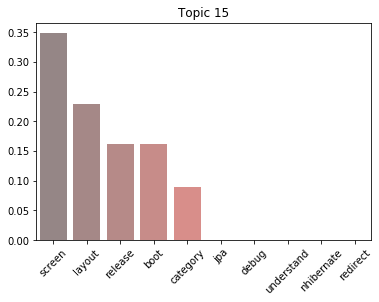

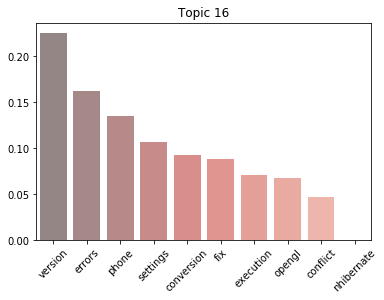

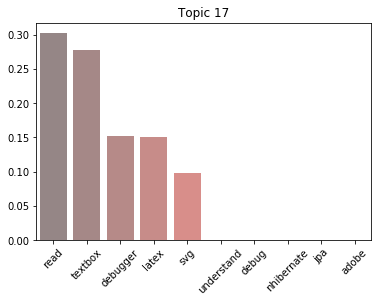

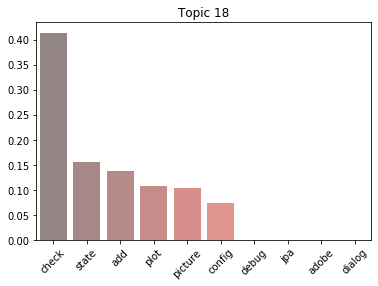

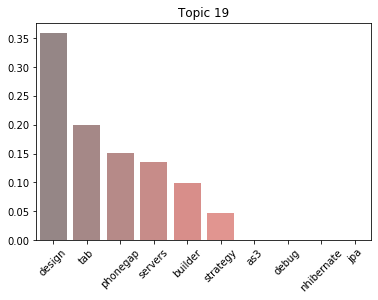

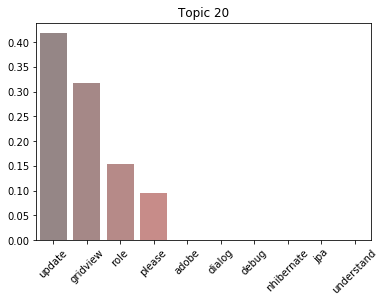

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda = gensim.models.ldamodel.LdaModel(corpus_tfidf,num_topics=150,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.16.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# 4.17 Bag of words => no_below=10, no_above=0.5, keep_n=1000, topics=50, passes=10

[(37,
  '0.284*"change" + 0.095*"framework" + 0.083*"studio" + 0.064*"action" + '
  '0.058*"instance" + 0.055*"match" + 0.046*"report" + 0.044*"part" + '
  '0.029*"settings" + 0.028*"resource"'),
 (21,
  '0.147*"eclipse" + 0.116*"host" + 0.089*"statement" + 0.072*"connect" + '
  '0.071*"import" + 0.062*"game" + 0.053*"bash" + 0.035*"scala" + '
  '0.034*"chart" + 0.034*"write"'),
 (18,
  '0.173*"type" + 0.144*"object" + 0.107*"size" + 0.091*"generate" + '
  '0.090*"convert" + 0.081*"connection" + 0.039*"layout" + 0.034*"auto" + '
  '0.029*"upload" + 0.028*"get"'),
 (7,
  '0.168*"search" + 0.150*"column" + 0.098*"validation" + 0.093*"spring" + '
  '0.085*"folder" + 0.046*"implementation" + 0.037*"ms" + 0.037*"integration" '
  '+ 0.035*"constructor" + 0.025*"reverse"'),
 (6,
  '0.286*"array" + 0.209*"show" + 0.077*"document" + 0.076*"word" + '
  '0.056*"run" + 0.046*"shell" + 0.024*"queue" + 0.021*"relate" + 0.019*"make" '
  '+ 0.018*"statements"'),
 (46,
  '0.305*"image" + 0.196*"query" 

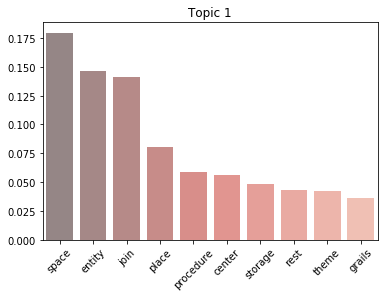

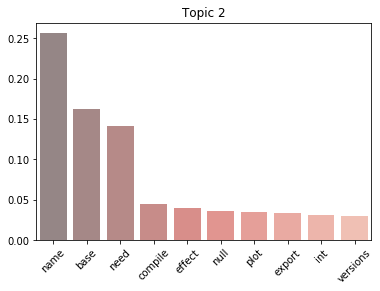

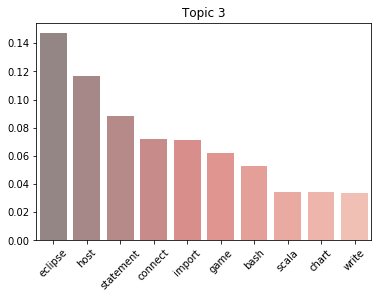

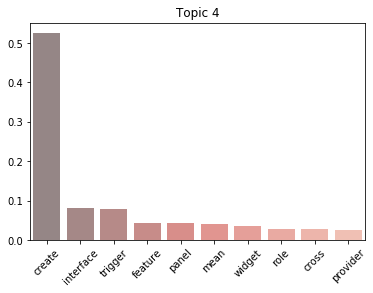

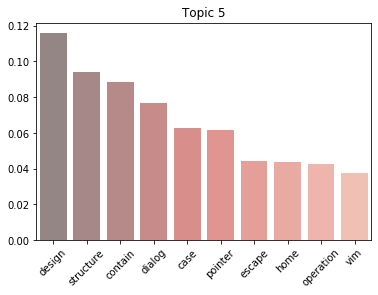

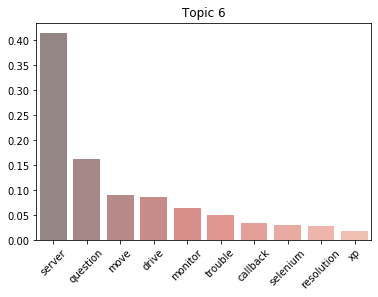

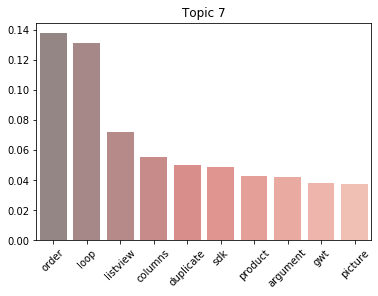

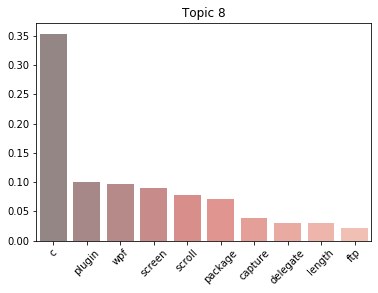

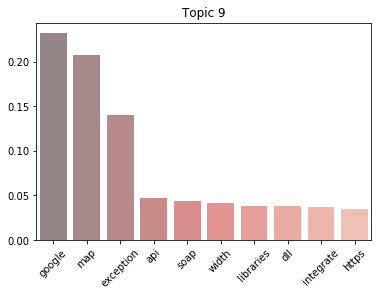

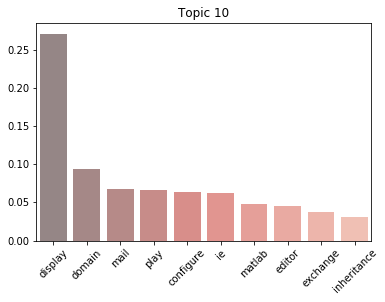

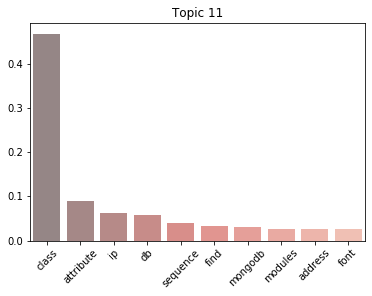

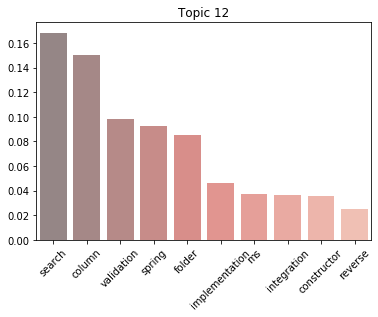

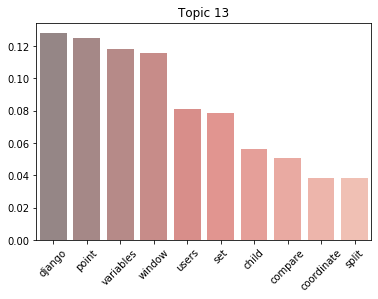

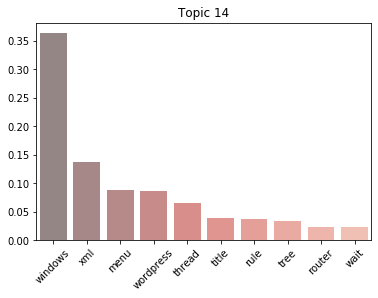

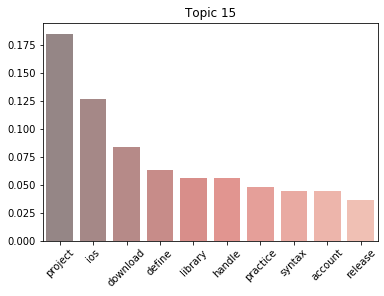

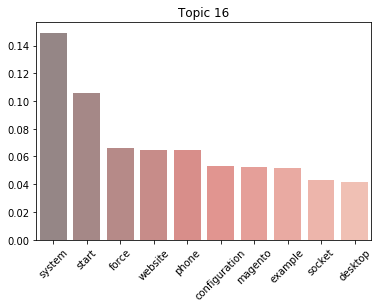

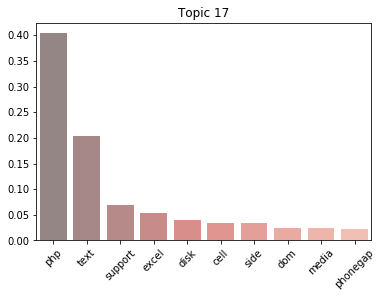

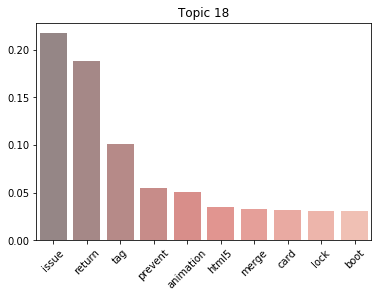

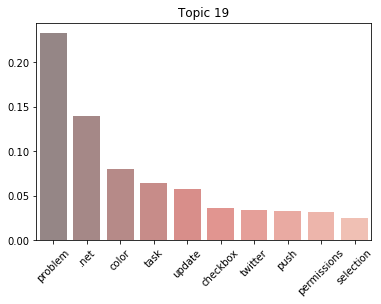

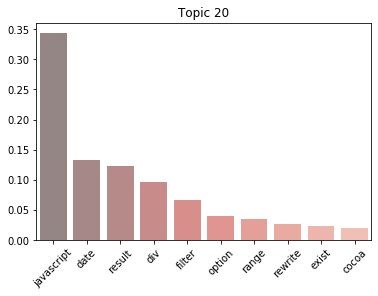

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=50,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.17.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# 4.18 Bag of words => no_below=10, no_above=0.5, keep_n=1000, topics=100, passes=10

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


[(13,
  '0.166*"css" + 0.150*"ajax" + 0.098*"information" + 0.092*"header" + '
  '0.084*"wcf" + 0.056*"navigation" + 0.054*"card" + 0.049*"permissions" + '
  '0.037*"symbol" + 0.037*"photo"'),
 (18,
  '0.654*"mysql" + 0.088*"encode" + 0.074*"player" + 0.073*"usage" + '
  '0.070*"throw" + 0.036*"flow" + 0.000*"jpa" + 0.000*"dialog" + 0.000*"debug" '
  '+ 0.000*"nhibernate"'),
 (58,
  '0.406*"image" + 0.362*"windows" + 0.081*"limit" + 0.039*"resource" + '
  '0.028*"ssl" + 0.027*"phonegap" + 0.025*"cod" + 0.018*"expressions" + '
  '0.012*"gcc" + 0.000*"adobe"'),
 (90,
  '0.350*"software" + 0.290*"look" + 0.176*"node" + 0.095*"languages" + '
  '0.076*"encrypt" + 0.000*"jpa" + 0.000*"dialog" + 0.000*"debug" + '
  '0.000*"compile" + 0.000*"nhibernate"'),
 (67,
  '0.301*"text" + 0.231*"line" + 0.135*"output" + 0.095*"http" + 0.049*"title" '
  '+ 0.041*"twitter" + 0.035*"sum" + 0.030*"proof" + 0.023*"youtube" + '
  '0.021*"protocol"'),
 (92,
  '0.283*"linux" + 0.242*"elements" + 0.183*"match" 

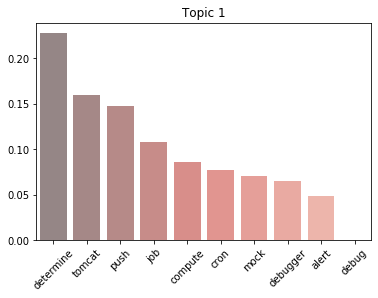

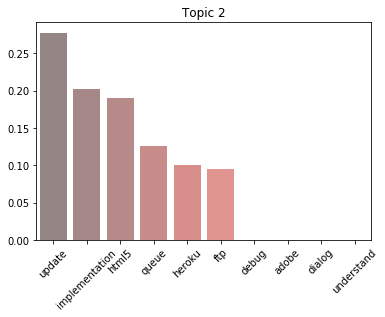

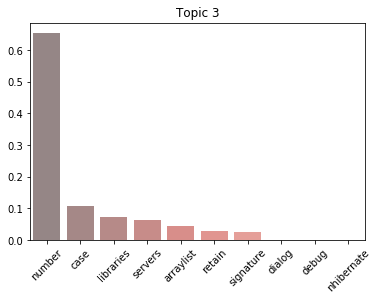

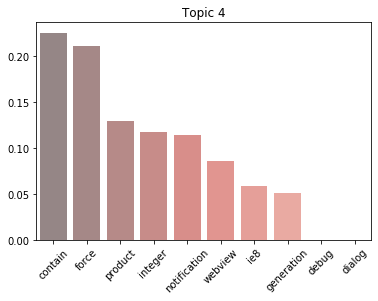

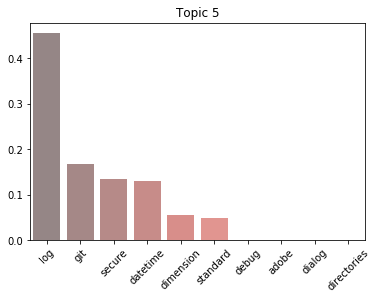

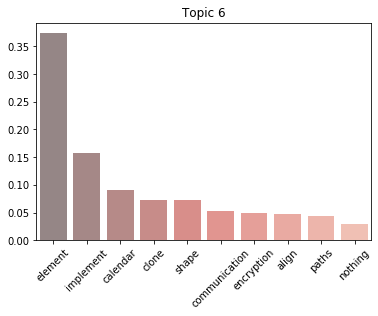

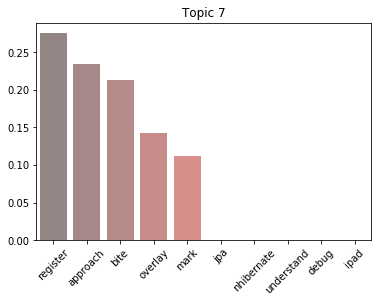

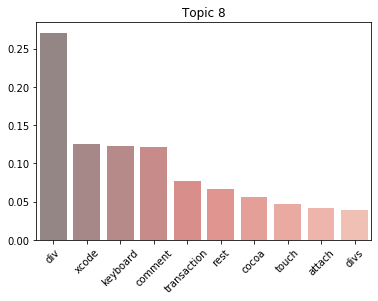

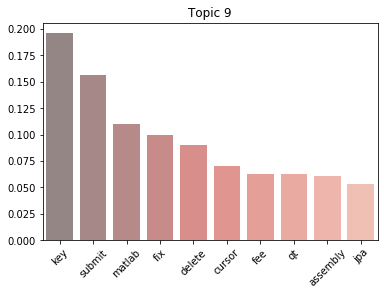

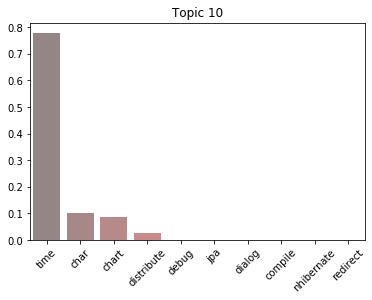

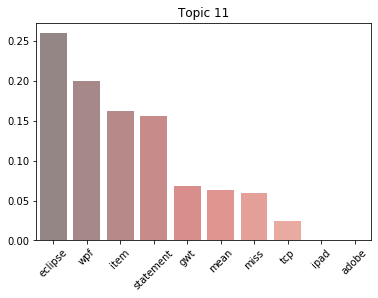

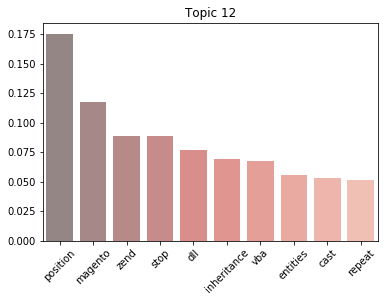

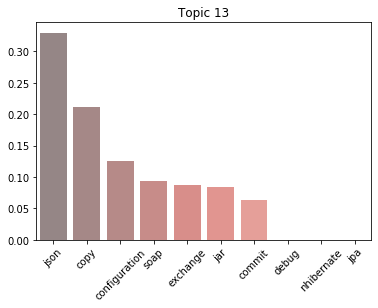

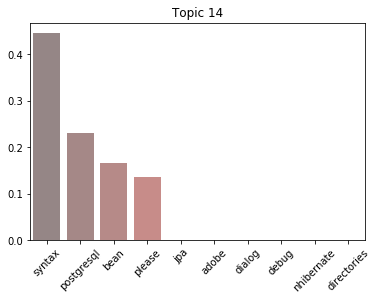

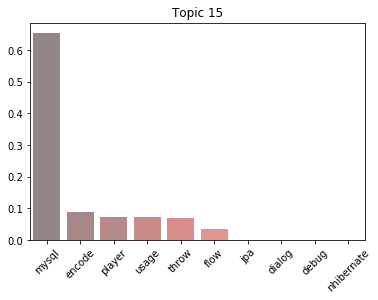

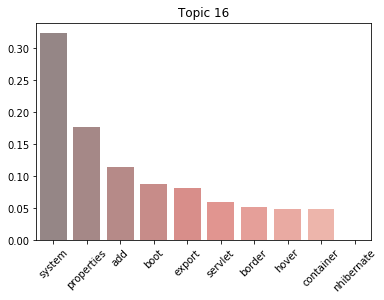

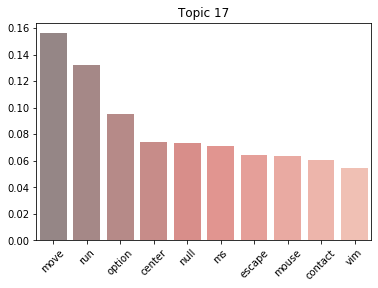

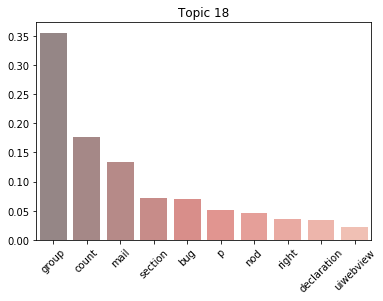

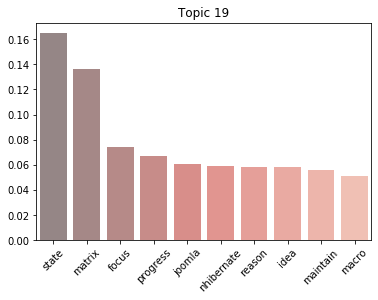

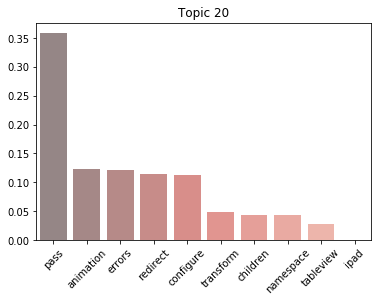

In [0]:
dictionary = corpora.Dictionary(df['Title'])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['Title']]
lda = gensim.models.ldamodel.LdaModel(corpus,num_topics=100,id2word=dictionary,passes=10)
pprint.pprint (lda.print_topics())

#Printing the topic coherence scores
for i in range(len(lda.print_topics())):
  print ("Topic ",str(i+1),": ")
  pprint.pprint (lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary)[-i-1][1])

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda.save('/content/drive/My Drive/lda_4.18.gensim')

NameError: ignored

# 5. Model evaluation


# 5.1 Evaluation metrics

### Coherence Measures

- *C_v* measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
- *C_umass* is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure

# 5.2 Common topics and description of key terms

### Some common recognizable topics: 
- Databases
- Web design
- General programming
- Syntax
- Apps
- Web apps
- Web framework
- Web development
- Servers
- Cloud computing
- Cloud servers
- Blogging
- Windows applications
- Image formatting
- Scripting
- Computer systems
- OS
- Data structures
- Data analysis
- Software framework
- Virtual/remote machine
- User interface
- Photos
- Networking
- Installation
- Integrated development environment (IDE)



#### Overview of common topics: 
- **Rail**: Ruby on Rails, or Rails, is a server-side web application framework written in Ruby under the MIT License. Rails is a model–view–controller framework, providing default structures for a database, a web service, and web pages.
- **Asp.net**: ASP.NET is an open-source server-side web-application framework designed for web development to produce dynamic web pages developed by Microsoft to allow programmers to build dynamic web sites, applications and services
- **JQuery**: jQuery is a JavaScript library designed to simplify HTML DOM tree traversal and manipulation, as well as event handling, CSS animation, and Ajax. It is free, open-source software using the permissive MIT License. As of May 2019, jQuery is used by 73% of the 10 million most popular websites.
- **.NET**: .NET Framework is a software framework developed by Microsoft that runs primarily on Microsoft Windows. It includes a large class library named as Framework Class Library and provides language interoperability across several programming languages
- **Django**: Django is a Python-based free and open-source web framework, which follows the model-template-view architectural pattern. It is maintained by the Django Software Foundation, an independent organization established as a 501 non-profit. Django's primary goal is to ease the creation of complex, database-driven websites.
- **Mvc**: Model–view–controller is a software design pattern commonly used for developing user interfaces which divides the related program logic into three interconnected elements. 
- **CSS**: Cascading Style Sheets (CSS) is a style sheet language used for describing the presentation of a document written in a markup language like HTML. CSS is a cornerstone technology of the World Wide Web, alongside HTML and JavaScript. CSS is designed to enable the separation of presentation and content, including layout, colors, and fonts.[3] This separation can improve content accessibility, provide more flexibility and control in the specification of presentation characteristics, enable multiple web pages to share formatting by specifying the relevant CSS in a separate .css file, and reduce complexity and repetition in the structural content.
- **Ajax**: Ajax is a set of web development techniques using many web technologies on the client side to create asynchronous web applications. With Ajax, web applications can send and retrieve data from a server asynchronously without interfering with the display and behavior of the existing page.
- **Haskell**: Web framework
- **Netbeans**: NetBeans is an integrated development environment for Java. NetBeans allows applications to be developed from a set of modular software components called modules.
- **Jdbc**: Java Database Connectivity is an application programming interface for the programming language Java, which defines how a client may access a database. It is a Java-based data access technology used for Java database connectivity. It is part of the Java Standard Edition platform, from Oracle Corporation. 
- **Scala**: Scala is a general-purpose programming language providing support for functional programming and a strong static type system. Designed to be concise, many of Scala's design decisions aimed to address criticisms of Java.

# 5.3 Model 4.12 **BASELINE MODEL** => TFIDF, no_below=10, no_above=0.5, keep_n=1000, topics=20, passes=10 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score (C_v):  0.428952041248815

Coherence Score (C_umass):  -11.938974724948476


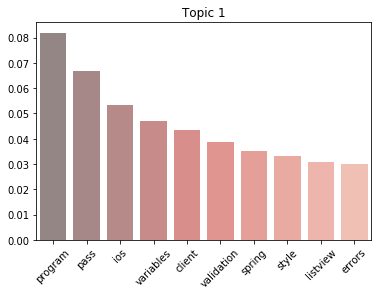

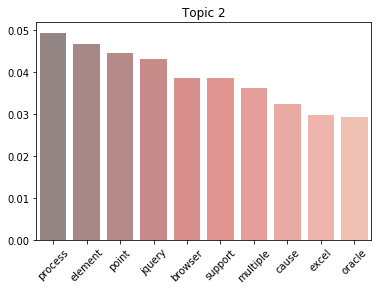

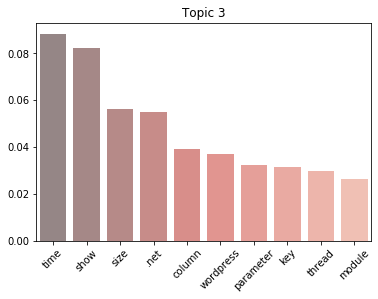

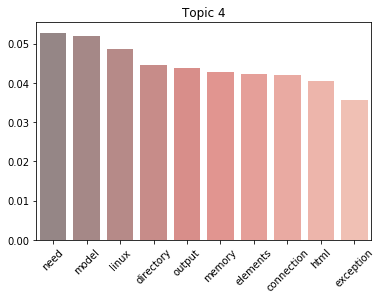

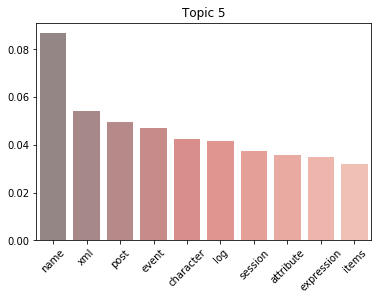

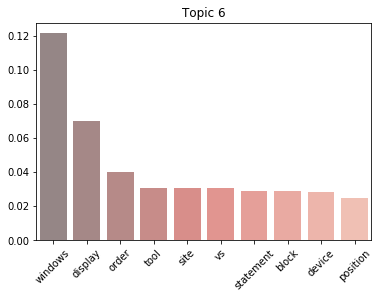

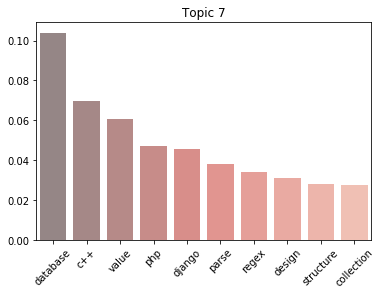

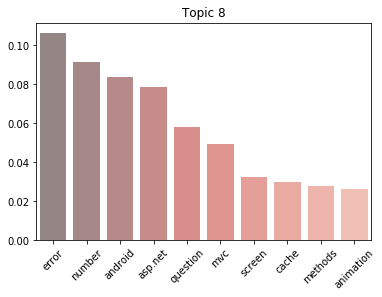

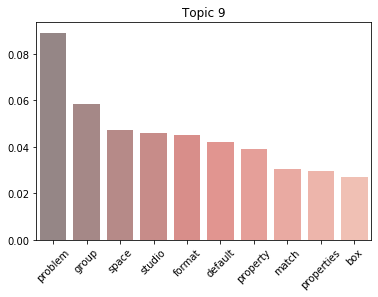

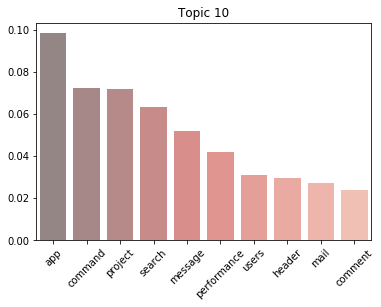

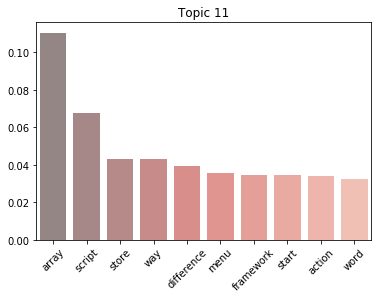

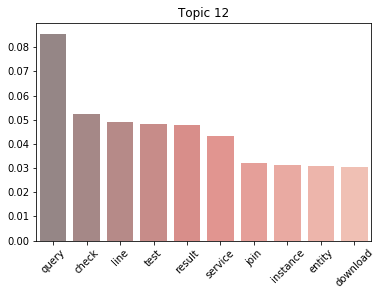

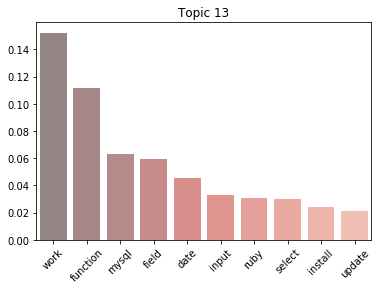

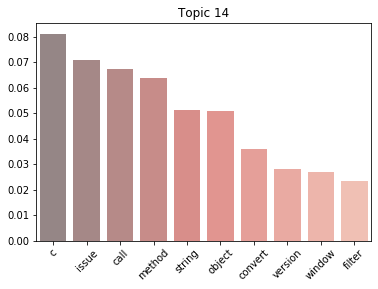

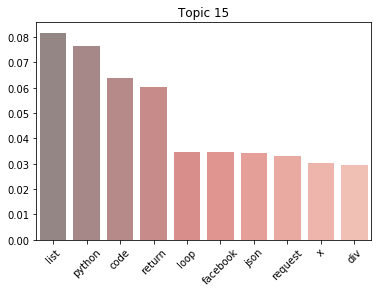

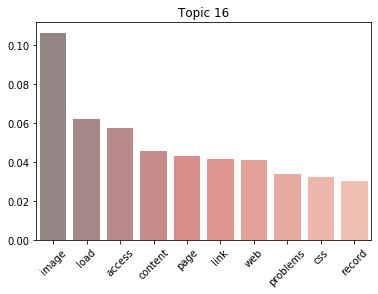

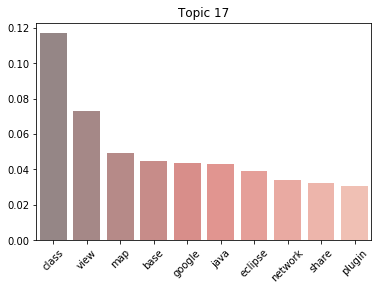

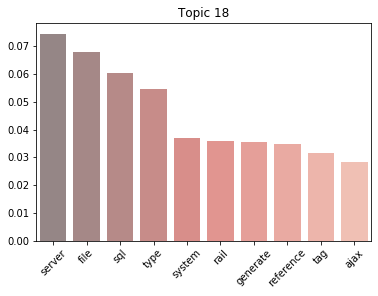

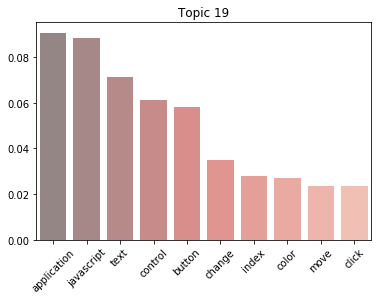

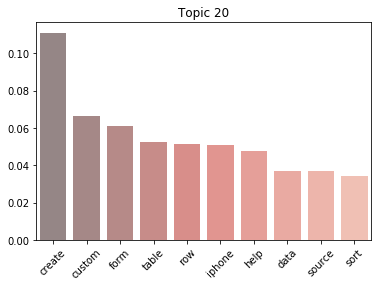

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.12.gensim')

# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (C_v): ', coherence_lda)

# Compute Coherence Score using c_umass
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus_tfidf, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (C_umass): ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

We have a **C_v coherence score of 0.4289** and a **C_umass score of -11.9389**. Just by themselves, these numbers don't provide much meaning. More models will need to be evaluated to determine if these results are good or not. 

In [0]:
# Visualize the topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.12.gensim')
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
LDAvis_prepared

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2     -0.075970  0.042523       1        1  6.028311
0     -0.170199 -0.055314       2        1  6.013814
5      0.156054 -0.001966       3        1  5.974107
7     -0.016704  0.175698       4        1  5.781103
16    -0.011858  0.177142       5        1  5.676146
1      0.138366  0.039507       6        1  5.625000
13    -0.045613 -0.019317       7        1  5.533867
18     0.069310 -0.043411       8        1  5.221511
14     0.055736 -0.188300       9        1  4.931794
6     -0.157474  0.196427      10        1  4.900030
11     0.087204 -0.091494      11        1  4.826601
17     0.160644 -0.104694      12        1  4.781701
3      0.008017  0.023030      13        1  4.583929
9     -0.025845 -0.172967      14        1  4.521049
10     0.079136 -0.022669      15        1  4.474097
15     0.147997  0.033763      16        1  4.473819
4     -0.220533 -0.118088      17        1  4.417896
8     -0.203150 -0.111172      18        1  4.122612
12     0.070799  0.142559      19        1  4.072767
19    -0.045915  0.098744      20        1  4.039855, topic_info=    Category         Freq      Term        Total  loglift  logprob
81   Default  2324.000000      work  2324.000000  30.0000  30.0000
145  Default  1758.000000     class  1758.000000  29.0000  29.0000
1    Default  1739.000000     image  1739.000000  28.0000  28.0000
36   Default  1588.000000   windows  1588.000000  27.0000  27.0000
195  Default  2090.000000  function  2090.000000  26.0000  26.0000
..       ...          ...       ...          ...      ...      ...
265  Topic20   141.502365     chart   143.190445   3.1971  -4.3493
225  Topic20   132.270370     sound   133.958450   3.1963  -4.4168
740  Topic20   129.896591        qt   131.584671   3.1960  -4.4349
793  Topic20   127.810555    relate   129.498627   3.1958  -4.4511
974  Topic20   126.091644    modify   127.779724   3.1957  -4.4646

[700 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
28       15  0.997996     .net
186       1  0.750032   access
186       7  0.134765   access
186      10  0.113909   access
627      11  0.993395  account
...     ...       ...      ...
118       3  0.996390        x
422       6  0.995470    xcode
20       14  0.997053      xml
812      12  0.990564     zend
686      15  0.988286     zoom

[798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 6, 8, 17, 2, 14, 19, 15, 7, 12, 18, 4, 10, 11, 16, 5, 9, 13, 20])

Before we evaluate the *pyLDAvis* visualization for our baseline model, a few notes on the graph: 
- The circles represent the different topics
- The proximity of each circle from another determines how similar the two topics are
- The size of the circle indicates the importance of the model. The number on the circles follows this notation as well where **topic 1** has the largest circe. 
- The axes don't give much information. The only thing to note would be that the TFIDF corpus (multi-dimensional sparse matrix) has been reduced to a two-dimensional space. This is essentially dimensionality reduction. In this case, *Principal Coordinate Analysis (PCoA)* is used to do the reduction. Unfortunately, the results of dimensionality reduction are not too interpretable in terms of concrete numbers. 
- The bar plot on the right shows the distribution of words in the corpus as well as in the selected topics. 

The first thing we want to note from model 4.12 is that the term *c* in **topic 4** is denoted as the most important term. This kind of makes sense as we can see from the distribution plots on the right. This term's frequency in the corpus is only slightly higher than it's frequency within the topic. 

### Topic 4
What this means is that this term is highly unique to this particular topic and hence could define the overall nature of the topic. As we can see from the graph, the only other topic in which this term exists is 20. 

For the other top words in this topic such as **issue, call, method and string**, all the occurrences of these words in the corpus is only within this topic. Hence, these words are completely unique to this topic. No other topics contain these words. This can potentially help in isolating one topic from another. 

### Topic 1

Key words in this topic include **image, content, css, page, link, access, load etc**. This would indicate that this topic has to do with things like **web page formatting, blogging, web page templates** and things of that nature. 

### Topic 2

This topic is slightly trickier to interpret. However, we do see some common themes appear if we combine some high level topics such as **databases, servers, web services, web pages and frameworks** together. 

For example, *ajax* provides client-side web technologies allowing web applications to retrieve data from online servers. On the other hand, *rails* is a server-side web application framework that provides structures for databases, web pages and web applications. When we compare these two terms, the similarity becomes apparent. Other terms that makes sense within this topic's context are **server, sql, system, file, type, generate, reference etc.**

### Topic 3

This topic seems to cover themes such as **programming, data types and API**. 

### Topic 5

**Web applications, user interface, web development**

So far, the 5 topics that we explored seem to have decent and somewhat interpretable themes. Let's see if we can optimize the model further before we explore more topics. 

# 5.4 Model 4.13 => TFIDF, no_below=10, no_above=0.5, keep_n=1000, topics=50, passes=10

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score (C_v):  0.6048870627240824

Coherence Score (C_umass):  -17.842770014598443


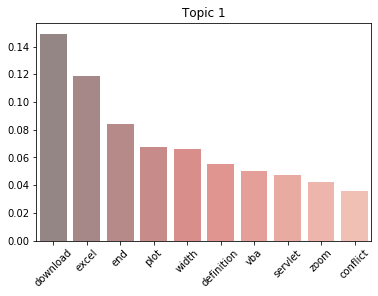

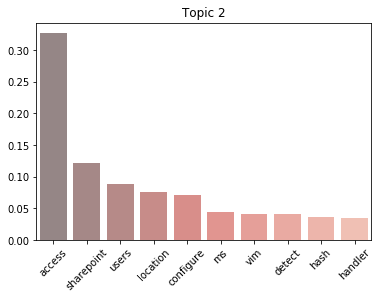

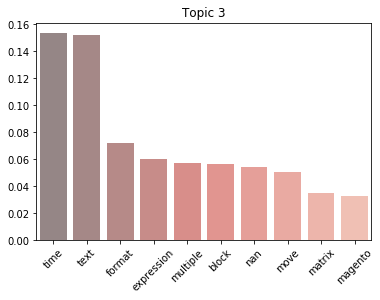

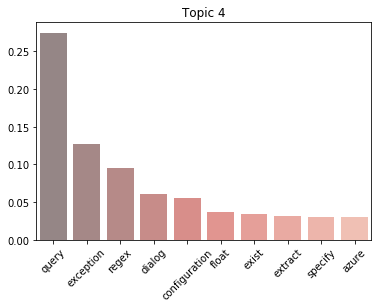

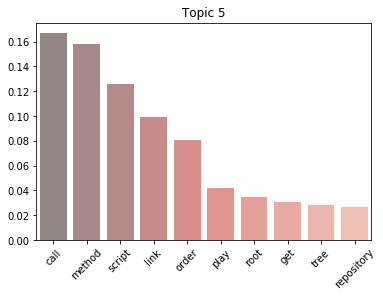

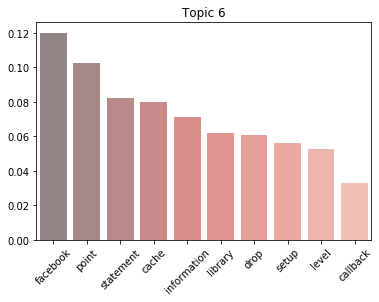

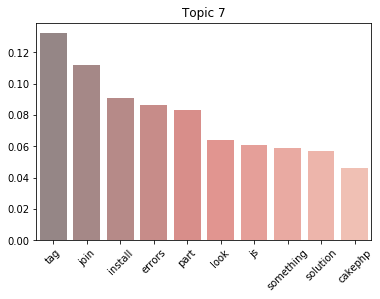

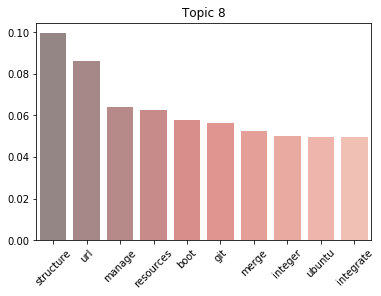

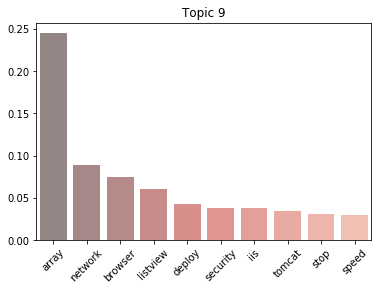

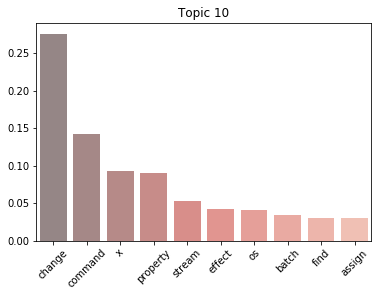

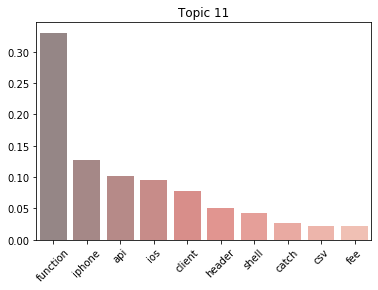

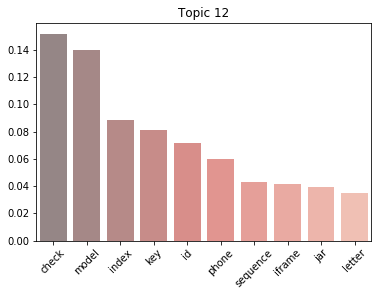

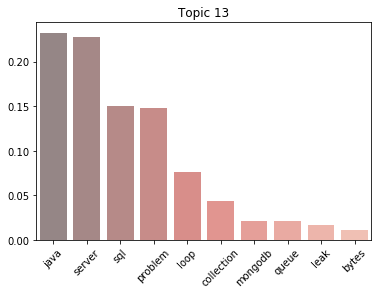

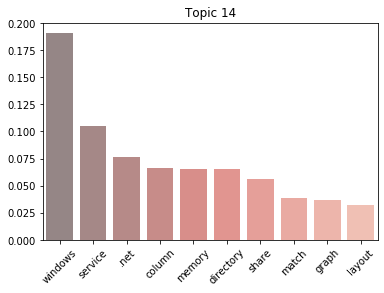

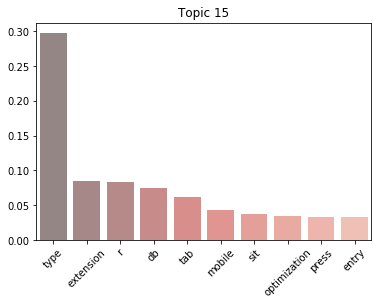

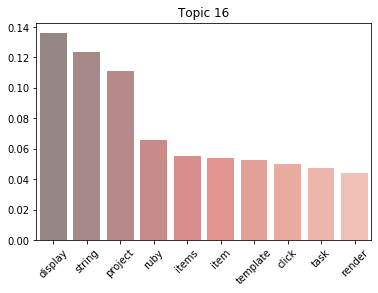

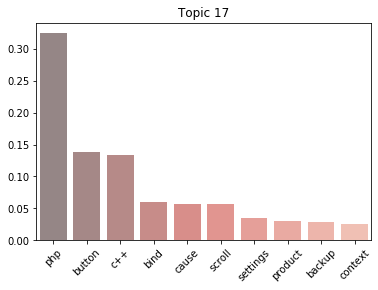

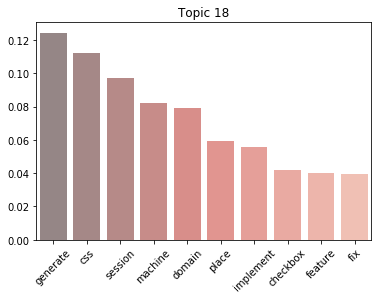

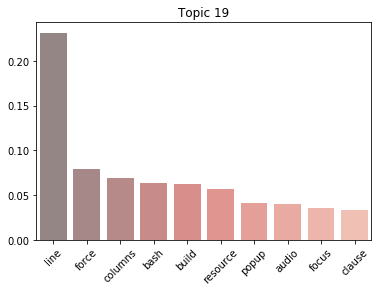

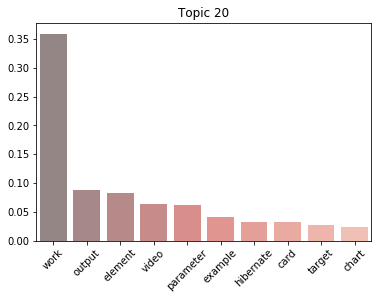

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.13.gensim')

# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (C_v): ', coherence_lda)

# Compute Coherence Score using c_umass
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus_tfidf, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (C_umass): ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
# Visualize the topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.13.gensim')
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
LDAvis_prepared

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
26     0.089037 -0.069802       1        1  3.222194
37     0.068535  0.334197       2        1  2.939288
1     -0.076283  0.115844       3        1  2.871619
31    -0.241447  0.003158       4        1  2.621578
22     0.063566 -0.010898       5        1  2.596404
20     0.033809 -0.041469       6        1  2.484245
29    -0.121984 -0.041569       7        1  2.420091
6      0.088231 -0.069415       8        1  2.418870
8     -0.043766 -0.005447       9        1  2.381806
40     0.063329 -0.011412      10        1  2.369391
4     -0.047901 -0.043294      11        1  2.363672
24    -0.061654 -0.004243      12        1  2.330214
2     -0.052348 -0.004793      13        1  2.318504
43     0.077975  0.202313      14        1  2.290952
47     0.063091 -0.011715      15        1  2.237926
32     0.061826 -0.098330      16        1  2.227389
39    -0.004984 -0.116837      17        1  2.194991
17    -0.089502 -0.003440      18        1  2.186239
19     0.038989 -0.018488      19        1  2.179870
13     0.062971 -0.011731      20        1  2.103673
23     0.054105 -0.091810      21        1  2.103219
36     0.063037 -0.011683      22        1  2.084845
28     0.062700 -0.012275      23        1  2.036138
9     -0.048419  0.180575      24        1  2.001402
16     0.062284 -0.012597      25        1  1.956205
5     -0.057902 -0.005335      26        1  1.954770
30     0.062705 -0.012038      27        1  1.943511
0     -0.113738 -0.010641      28        1  1.935553
46     0.062381 -0.012486      29        1  1.928960
10     0.062530 -0.012197      30        1  1.839129
14    -0.137582 -0.001463      31        1  1.815873
48    -0.109861 -0.002765      32        1  1.805512
42     0.001730 -0.009098      33        1  1.780160
25    -0.044615 -0.006479      34        1  1.772801
33     0.062033 -0.012644      35        1  1.766186
38    -0.092493 -0.003933      36        1  1.710005
3      0.034727 -0.039503      37        1  1.709112
18     0.062134 -0.012660      38        1  1.673972
44     0.070311  0.105213      39        1  1.629589
12    -0.138935 -0.001873      40        1  1.614620
27    -0.060464 -0.006170      41        1  1.610390
34     0.061376 -0.013299      42        1  1.554988
11    -0.027357 -0.008554      43        1  1.479502
41    -0.043993 -0.007122      44        1  1.451397
21     0.061294 -0.013227      45        1  1.430363
7      0.060738 -0.013656      46        1  1.424270
45     0.061107 -0.013379      47        1  1.398117
49     0.060889 -0.013626      48        1  1.367184
35     0.060657 -0.013764      49        1  1.295348
15    -0.122868 -0.004140      50        1  1.167956, topic_info=    Category         Freq        Term        Total  loglift  logprob
97   Default  2424.000000      jquery  2424.000000  30.0000  30.0000
188  Default  2241.000000       value  2241.000000  29.0000  29.0000
81   Default  2185.000000        work  2185.000000  28.0000  28.0000
6    Default  2175.000000       error  2175.000000  27.0000  27.0000
195  Default  2080.000000    function  2080.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
335  Topic50     0.040581   wordpress   457.518372  -4.8804 -11.2652
336  Topic50     0.040581  generation    85.666809  -3.2050 -11.2652
337  Topic50     0.040581        divs   100.558517  -3.3653 -11.2652
318  Topic50     0.040581      system   583.985535  -5.1244 -11.2652
320  Topic50     0.040581        post   707.126892  -5.3157 -11.2652

[1998 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
732      25  0.985758  .htaccess
28        2  0.997947       .net
539      11  0.961257         \\
565      31  0.975814     \\frac
935      43  0.979799   \\mathbb
...     ...       ...        ...
748      29  0.984837    youtube
919      32  0.978540          z
812  

This model basically increases the number of topics to 50. This means that the distributions of important words within each topic will be higher. Therefore, hopefully the topics become more clearer and concrete. 

First things first, let's look at the coherence metrics. 
- Coherence Score (C_v):  0.6048870627240824
- Coherence Score (C_umass):  -17.842770014598443

The first thing to notice in the pyLDAvis plot is that the relative difference in size between the different topics is less. This could indicate that there might be subtle differences across each topic. 

### Topic 1

We will need to change our strategy while evaluating this model with 50 topics. 
Since the importance is spread across fewer number of terms within a topic, it is more important to consider 
the very top terms, maybe the first 5-10. As seen in the graph, the distribution is highly right-skewed indicating
that the importance of terms drops sharply. For topic 1, the themes are not obviously apparent. But if we really want to
extract some information, the topics seem to be **data structures and apps**. 

Another thing to note about this topic is that there are many "semantically" similar topics near this one in the 
two-dimensional PCoA space. Perhaps that's the reason why the topics are not too interpretable. 

### Topic 2

**Web services, cloud services, IDE**

### Topic 3

This topic actually makes a lot of sense with themes coming up such as **Databases, querying, analytics**.
Important terms include **java, server, sql, mongodb, queue, databases, analytics, jdbc, data etc.**

### Topic 4

Once again, there are a few databases terms such as **mysql, oracle, insert**. However, the rest of the terms are pretty generic. 
Terms such as **object, convert, scala** would go under general programming. Therefore our topics can be **general programming, database systems**. 


  

# 5.5 Model 4.14 => TFIDF, no_below=10, no_above=0.5, keep_n=1000, topics=100, passes=10

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score:  0.6647341994984697

Coherence Score (C_umass):  -18.042532646723842


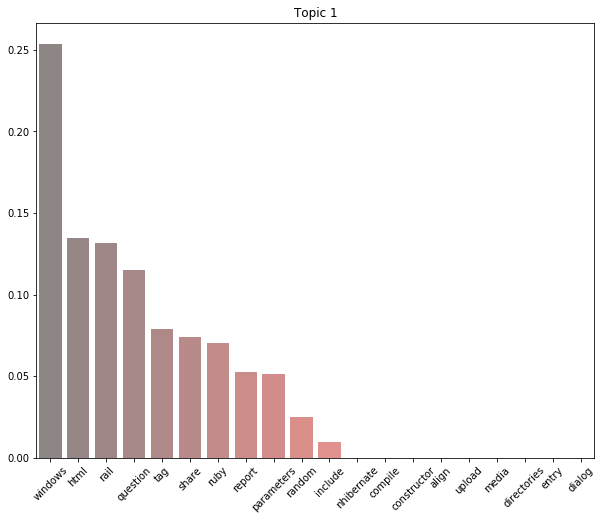

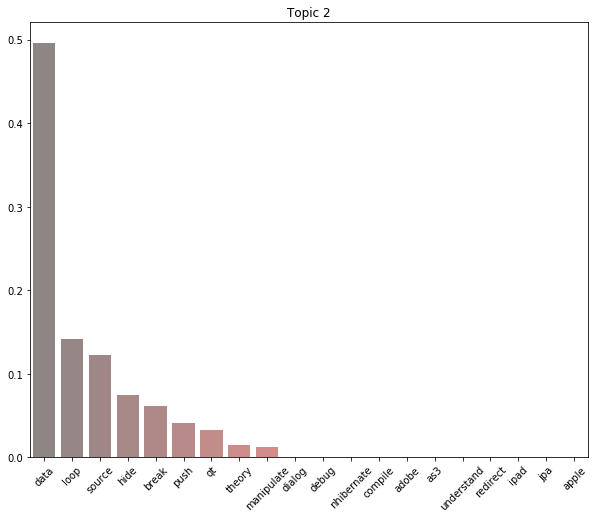

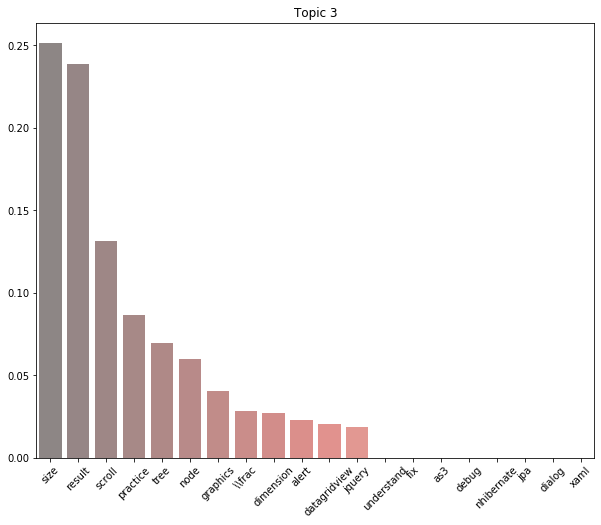

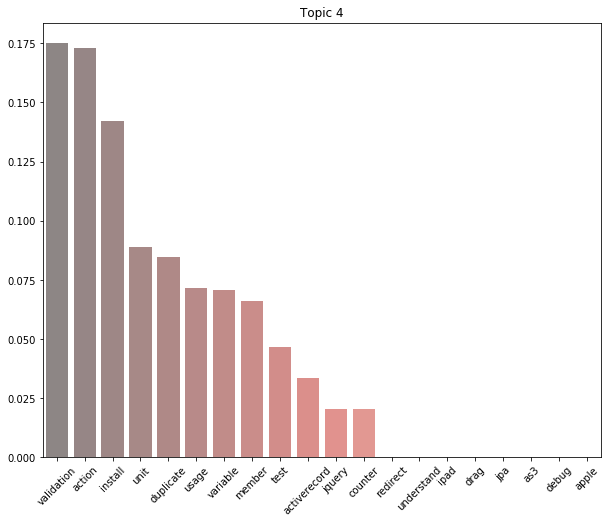

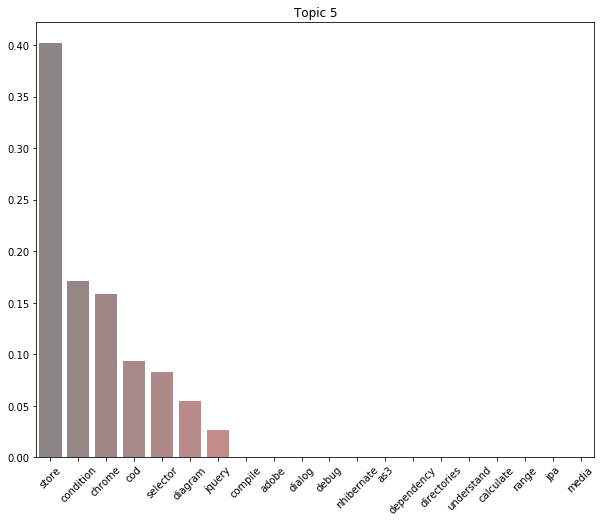

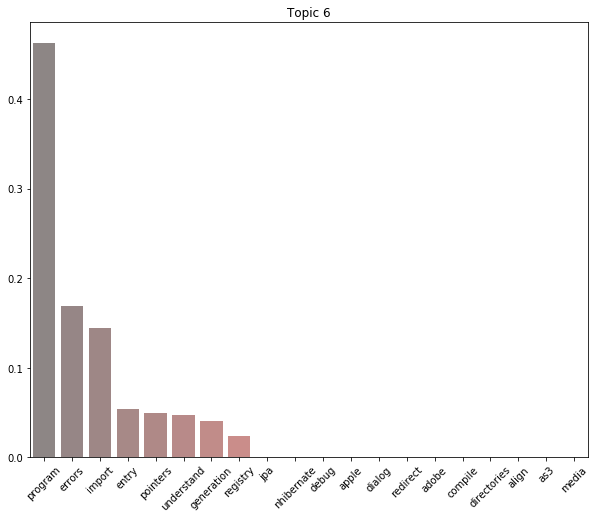

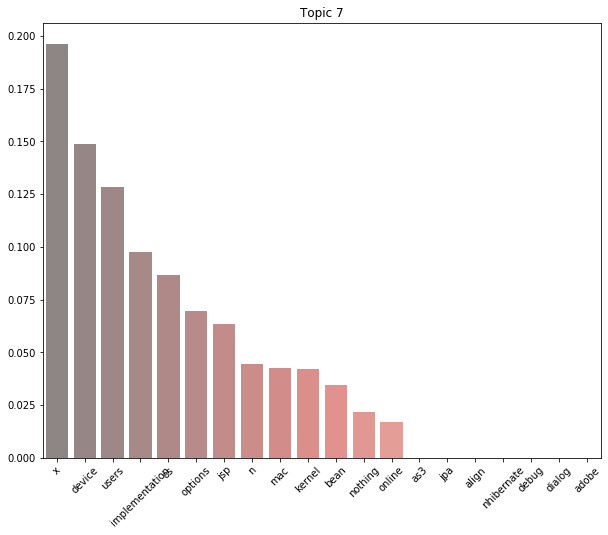

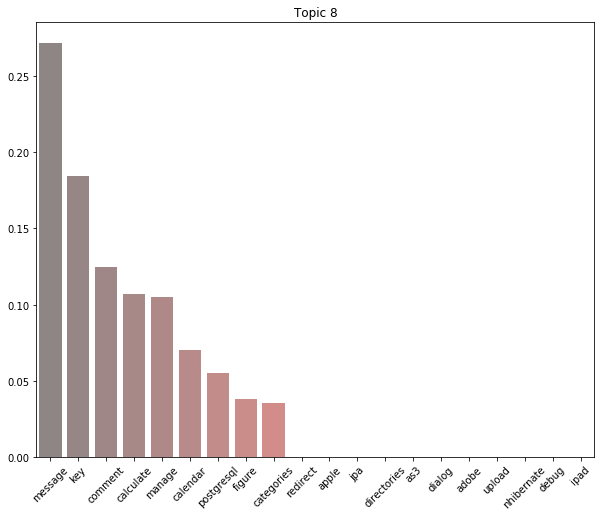

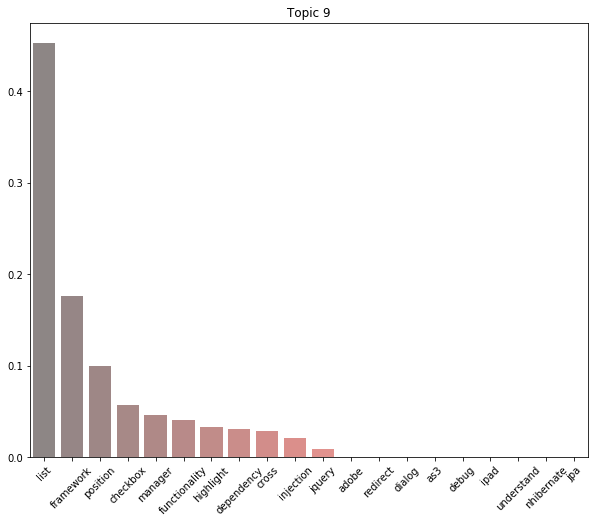

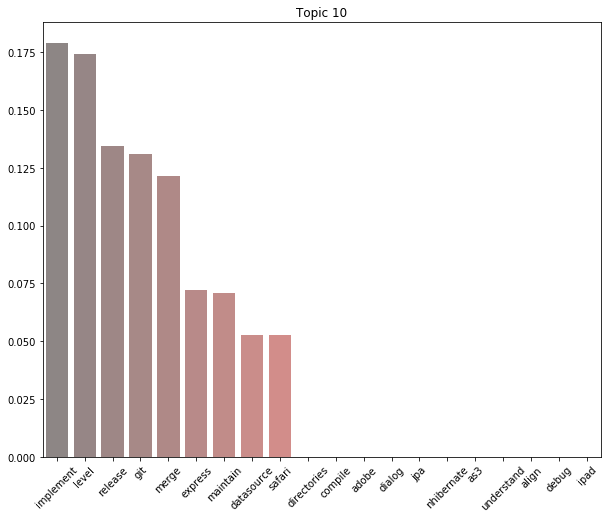

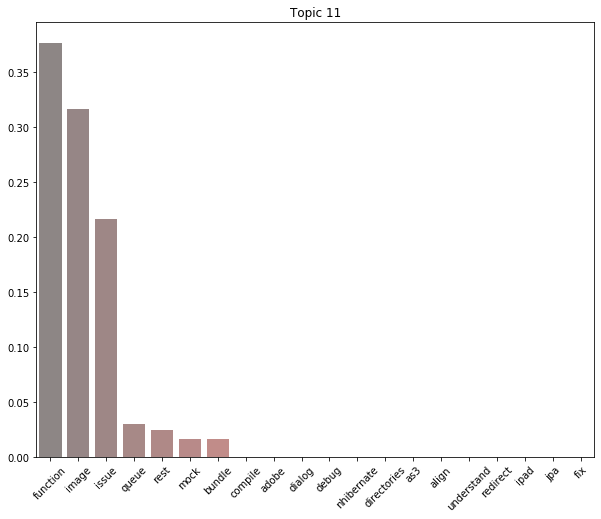

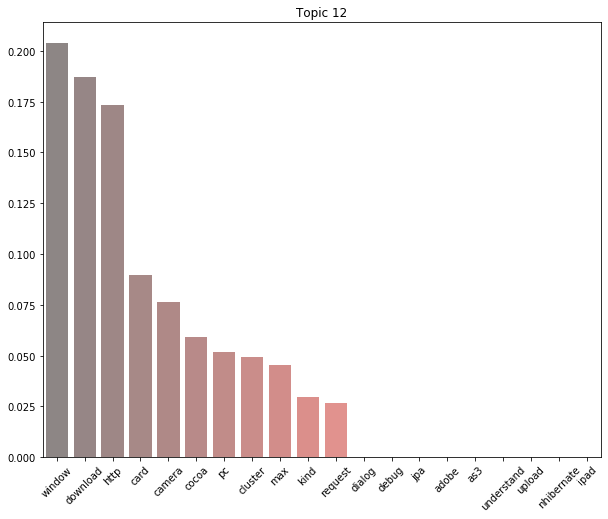

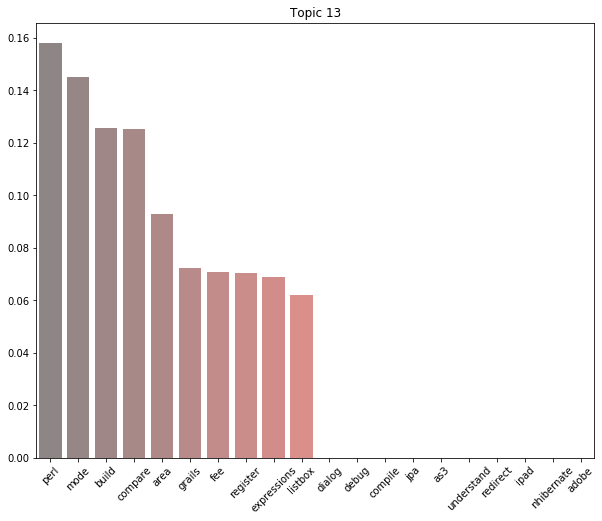

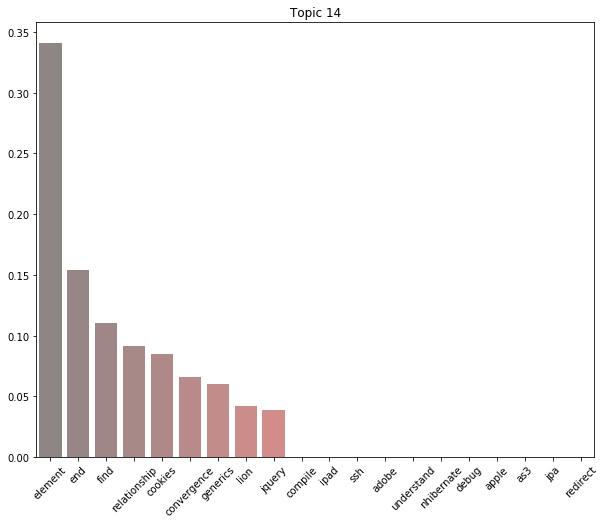

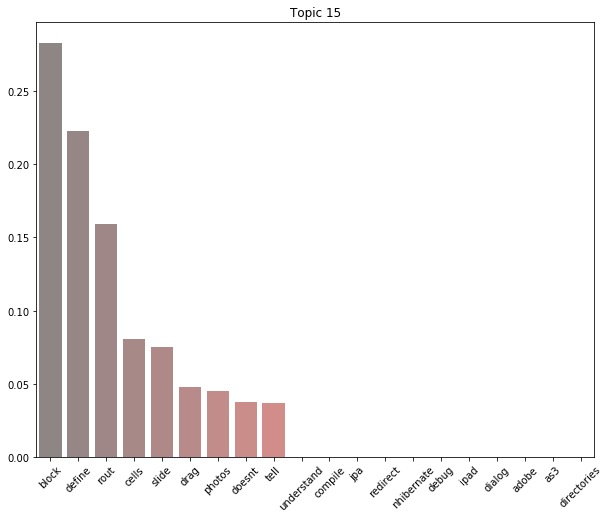

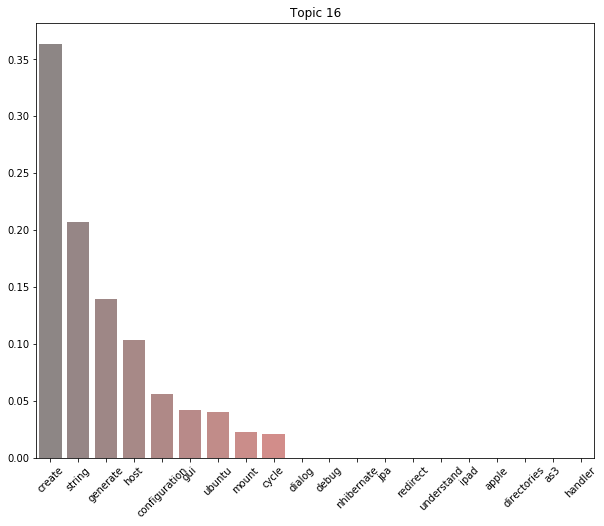

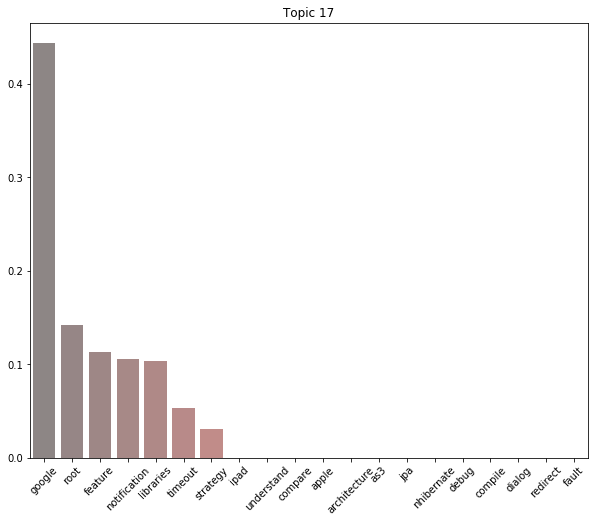

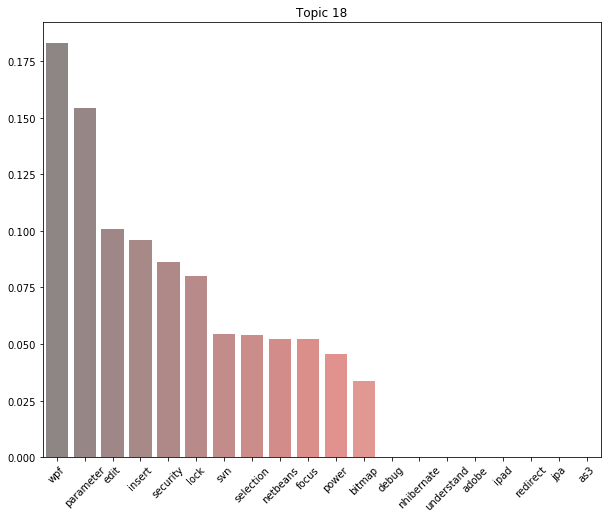

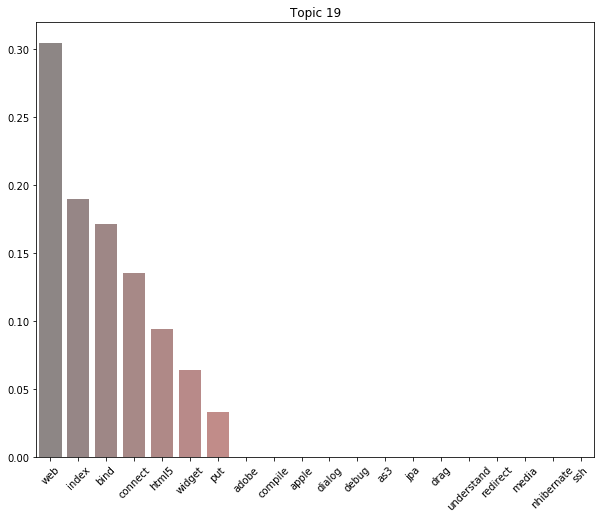

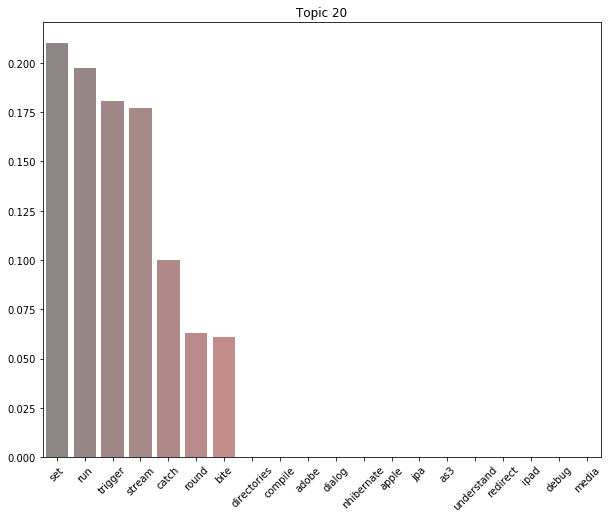

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.14.gensim')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Compute Coherence Score using c_umass
coherence_model_lda = CoherenceModel(model=lda, corpus=corpus_tfidf, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (C_umass): ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure(figsize=(10,8))
  #unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=20)[-i-1][0]))
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=20)[i][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
# Visualize the topics
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.14.gensim')
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
LDAvis_prepared

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


IndexError: ignored

It appears that pyLDAvis is not executing for the model with 100 topics. However, we can do a similar analysis as the previous models by looking at the the graphs we generated using seaborn. 

### Topic 1

As discussed earlier, as the number of topics goes up, the amount of 
important words within each topic decreases. We see the same trend for 
model 4.14 with a 100 topics. This topic does not have clear themes. The only
words that make sense together are **location, remote, permission and cms** which 
would seem to indicate topics such as **virtual computer, remote access, authentication**.

### Topic 2

Too vague to interpret

### Topic 3

The most obvious theme here is **networking** with words such as **address, ip, encode**. 
The other words are not too obvious to categorize. 

### Topic 4

Words like **limit, cache and deny** would seem to indicate topics such as 
**API transactions, web crawling**. Additional words such as **textbox and translate** would
seem to indicate **text translation, search engine**. 

### Topic 5

Not clear

# 5.6 Model 4.15 => TFIDF, no_below=10, no_above=0.5, keep_n=1000, topics=150, passes=10

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score:  0.6878329623033028


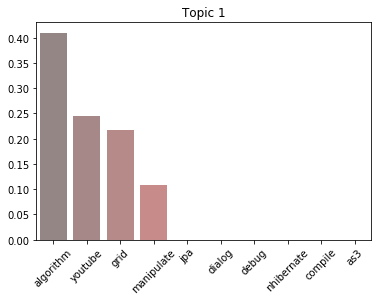

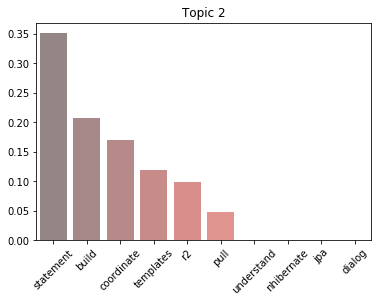

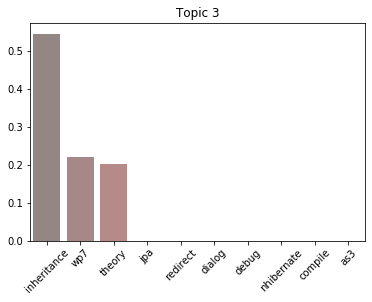

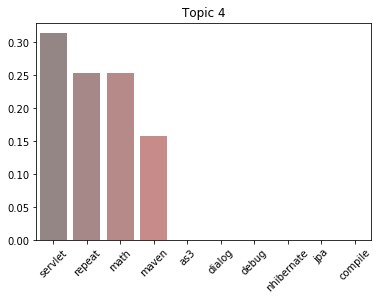

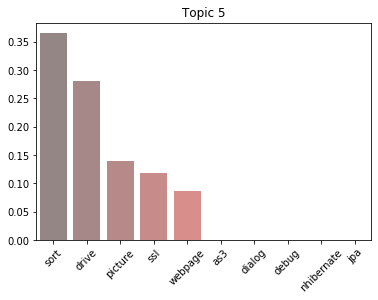

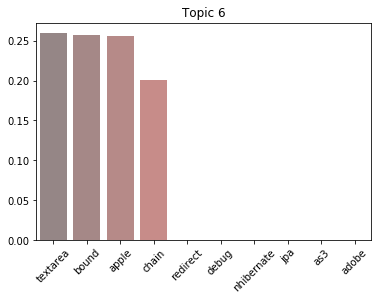

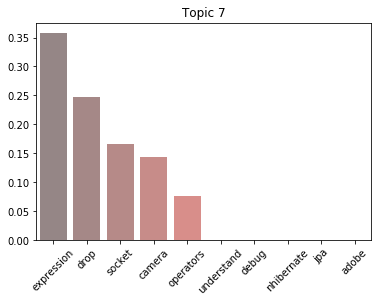

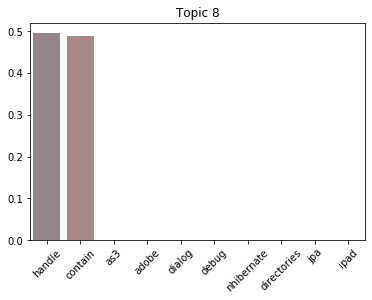

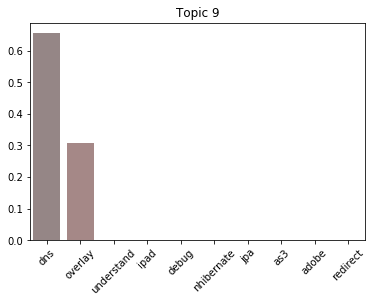

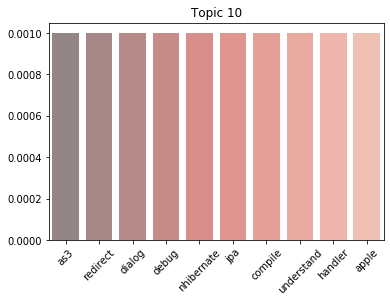

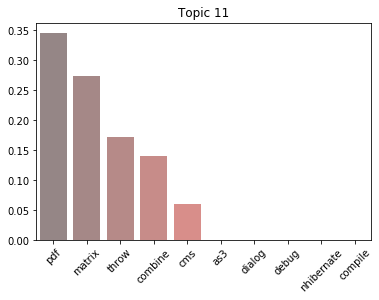

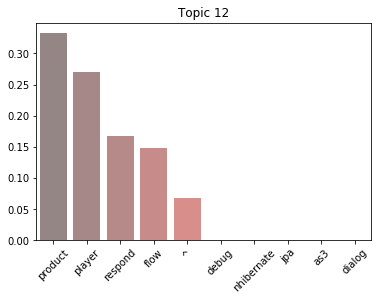

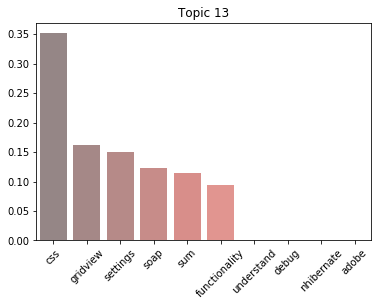

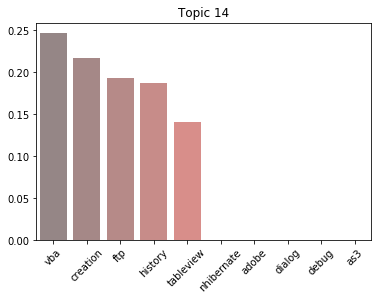

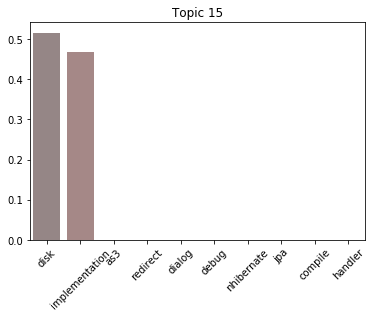

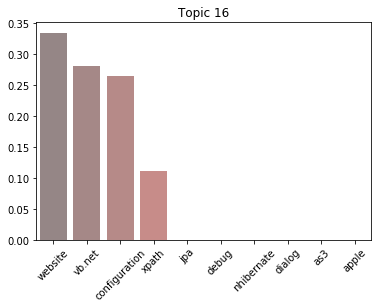

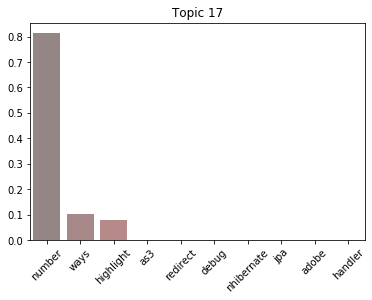

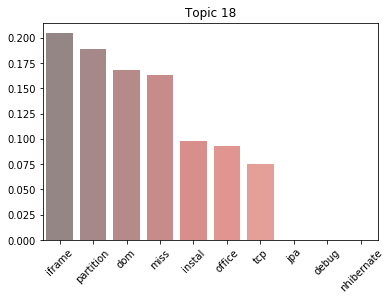

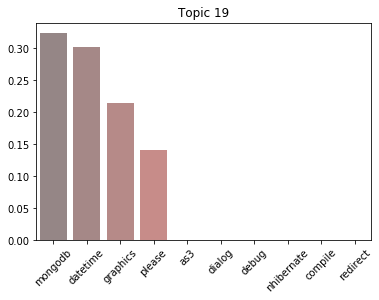

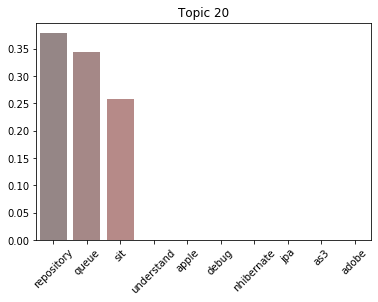

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.15.gensim')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score:  0.6792287032809524


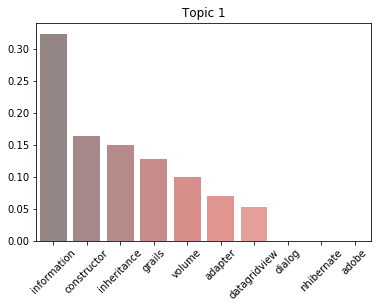

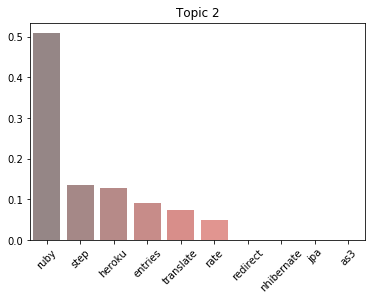

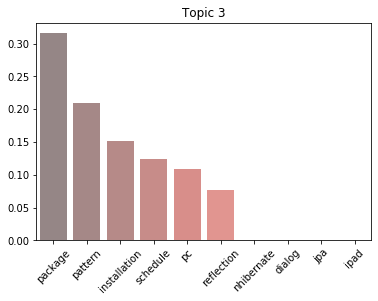

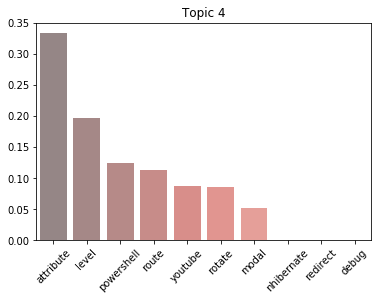

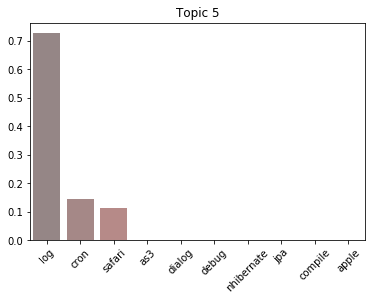

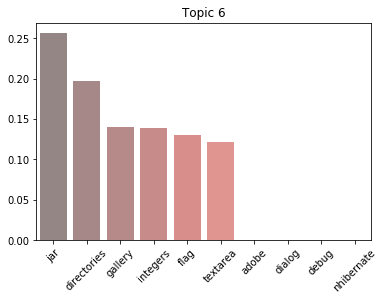

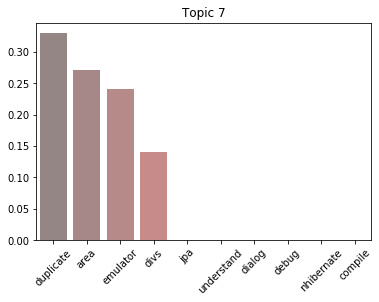

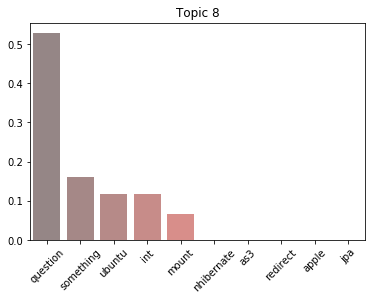

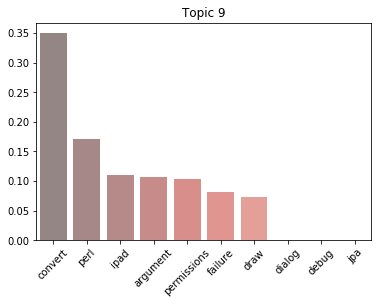

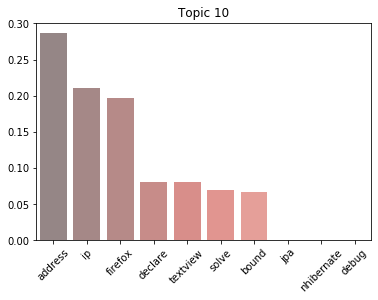

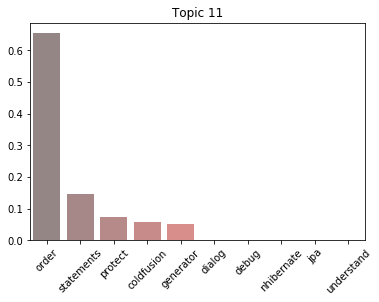

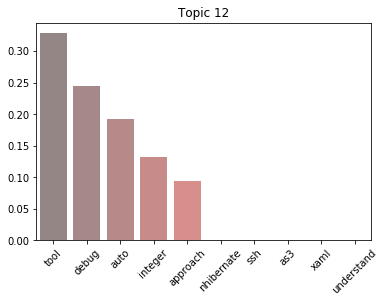

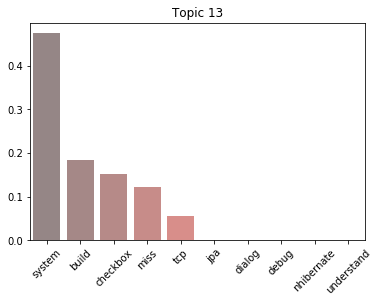

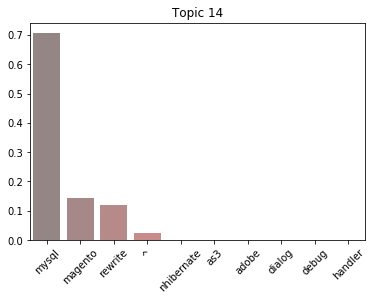

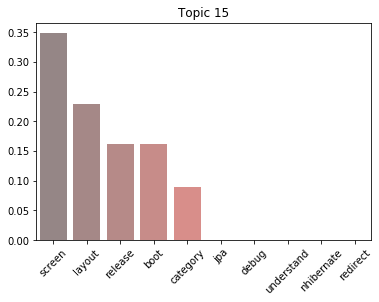

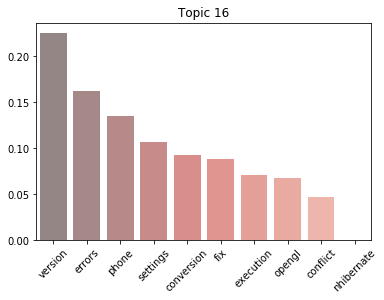

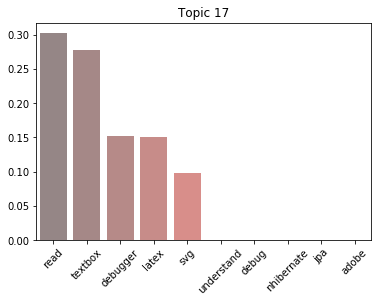

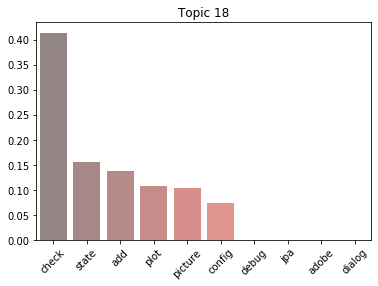

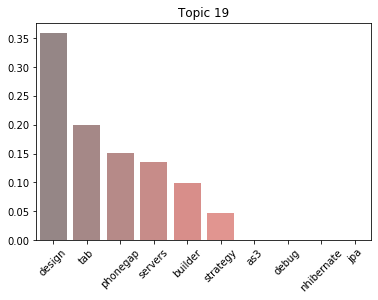

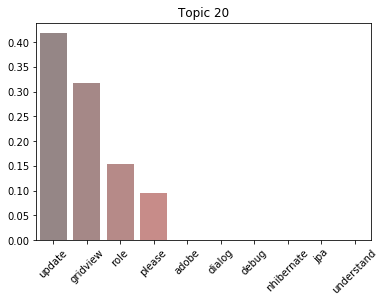

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.16.gensim')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Coherence Score:  0.6084067379579831


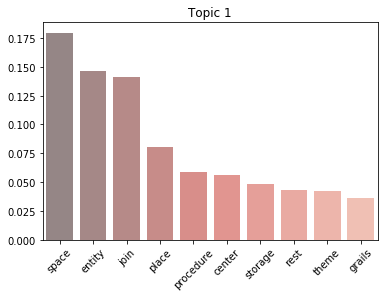

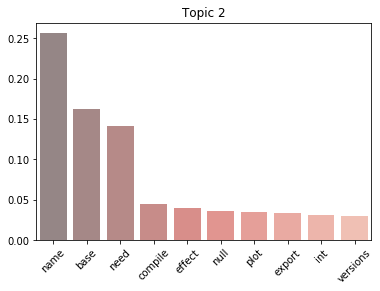

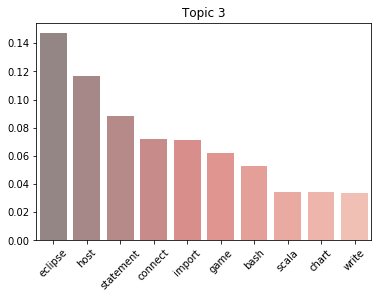

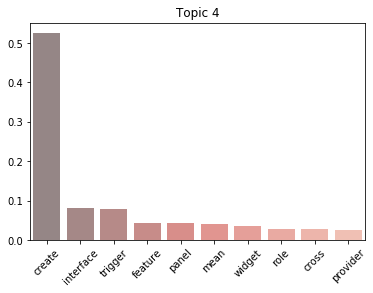

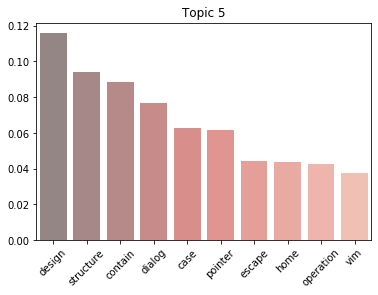

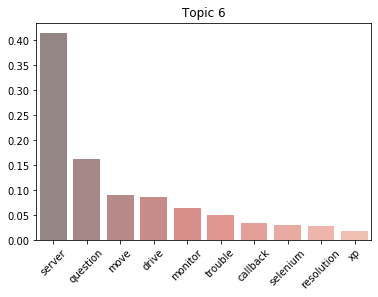

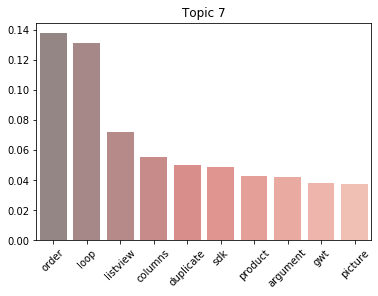

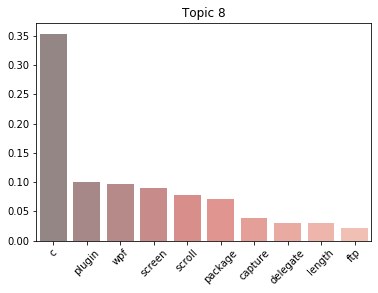

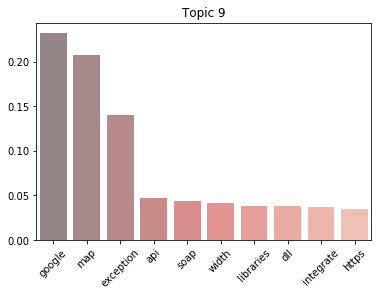

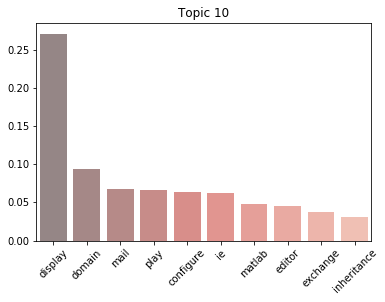

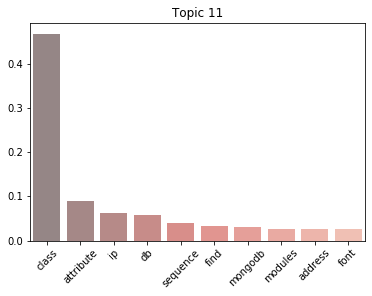

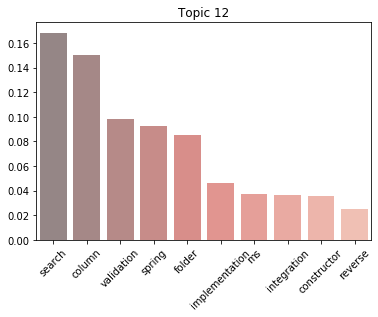

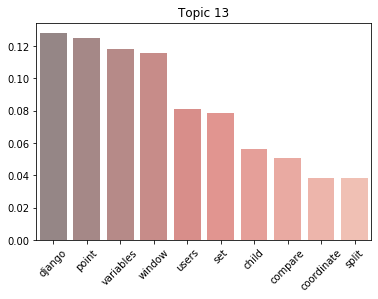

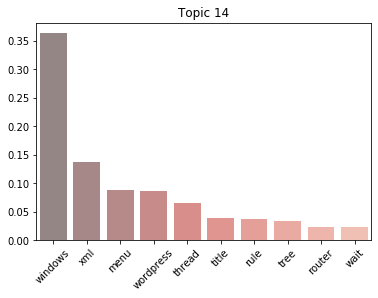

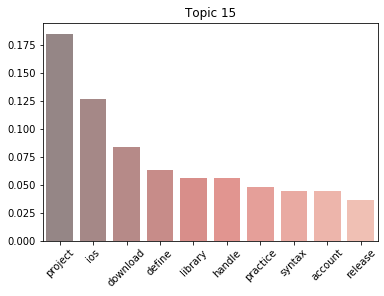

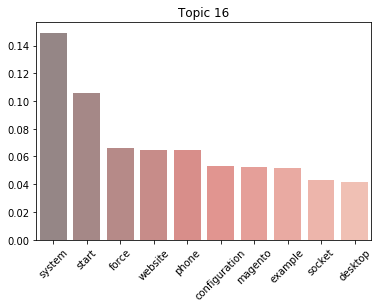

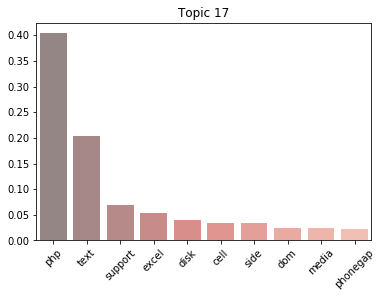

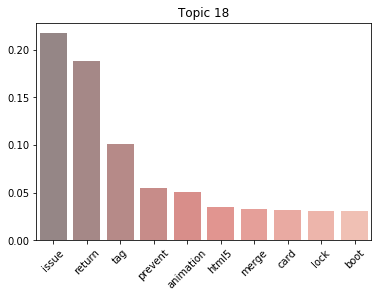

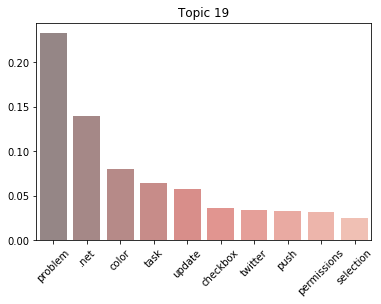

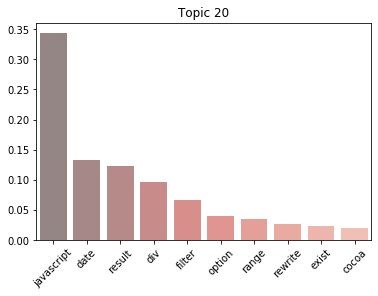

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.17.gensim')

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

In [0]:
lda = gensim.models.ldamodel.LdaModel.load('/content/drive/My Drive/lda_4.18.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=df['Title'], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6642602008838597


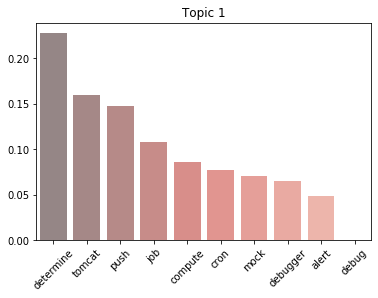

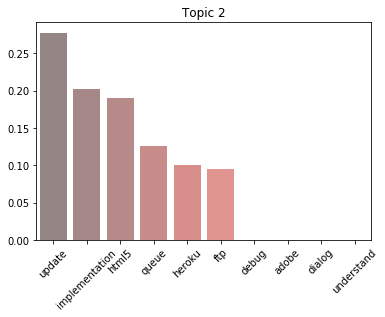

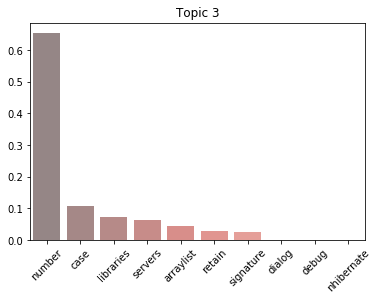

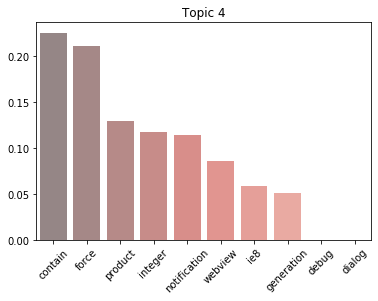

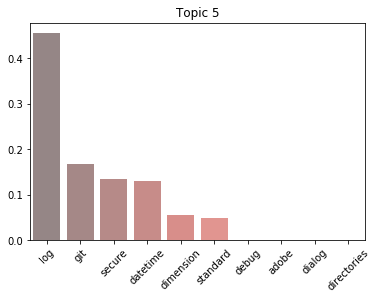

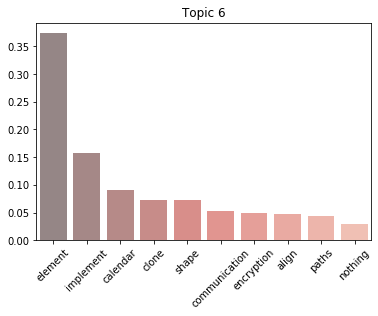

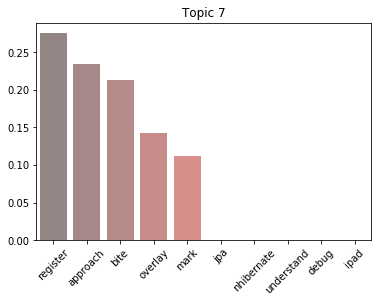

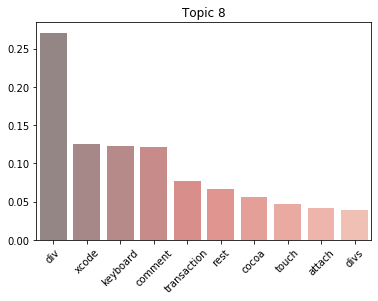

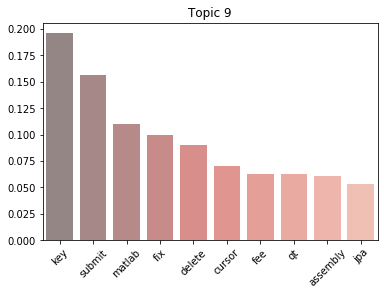

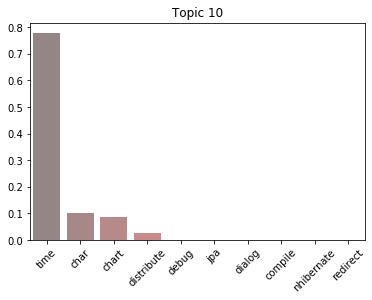

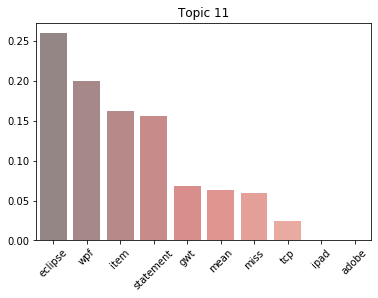

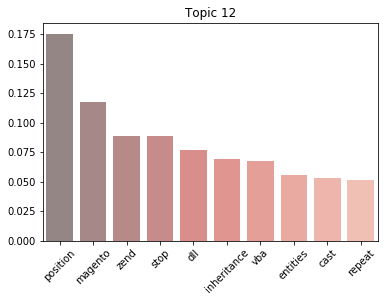

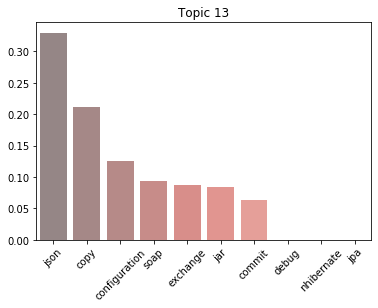

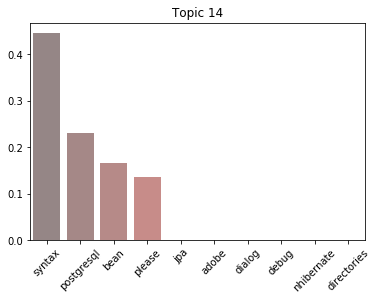

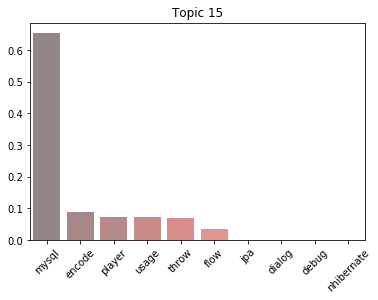

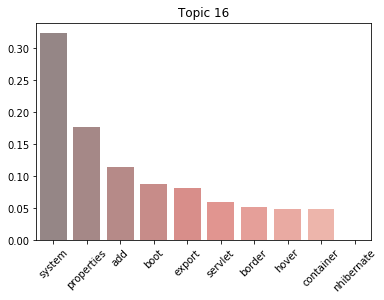

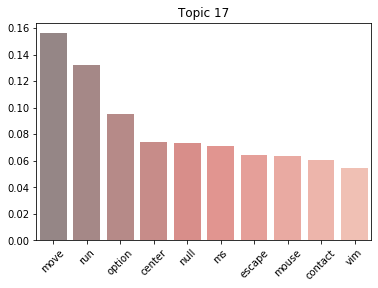

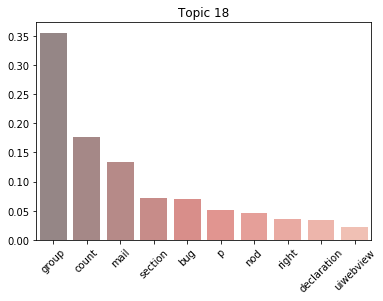

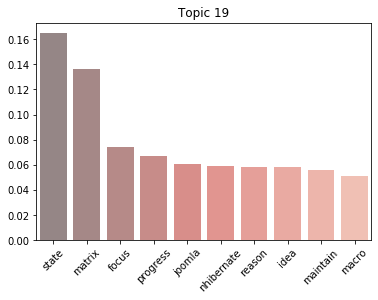

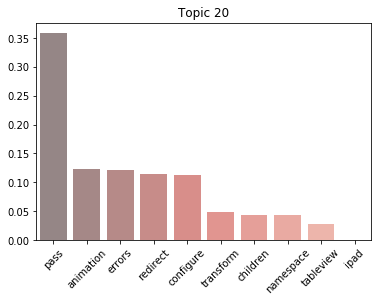

In [0]:
#Printing the word distributions in each topic
for i in range(len(lda.print_topics())):
  plt.figure()
  unzip = list(zip(*lda.top_topics(corpus=corpus,texts=df['Title'],dictionary=dictionary,topn=10)[-i-1][0]))
  sns.barplot(x=list(unzip[1]),y=list(unzip[0]),palette='Reds_d',alpha=0.6)
  plt.title('Topic '+str(i+1))
  plt.xticks(rotation=45)

# 5.4 Hyperparameter tuning

### Key metrics
- Topic interpretability
- Word distribution in each topic
- Word distribution in other topics
- Overall word distribution
- Coherence scores

## 5.4.1 Number of topics

## 5.4.2 Alpha

## 5.4.3 Beta